In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig 

In [2]:
plt.style.use( ['science', 'no-latex'])

In [1]:
def logattacktime(signal, HEIGHT, dev=0):
   
    
    RMS=librosa.feature.rms(signal, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0] # find RMS of signal
    
    frames = range(len(RMS)) # frames in RMS
    t= librosa.frames_to_time(frames , hop_length=HOP_LENGTH) 
    
    peaksample, _ = sig.find_peaks(RMS, width=1, distance=1, height=HEIGHT) #sample of peak of RMS signal
    peaksample = peaksample[0] - dev
    
    peak_ninety = 0.9 * RMS[peaksample] #Amplitude value of 90% of peak
    peak_twenty = 0.2 * RMS[peaksample]
    
    #threshold for 90%
    k = 1
    while peak_ninety <= RMS[peaksample - k]:
        k += 1
    
    j = k - 1
    
    #linear interpolate time for peak ninety
    # x = x1 +(y-y1)*(x2-x1)/(y2-y1)
    # x = x{p-k} + (y{p_ninety} - y{p-k})(x{p-j}-x{p-k})/(y{p-j} - y{p-k})
    
    t_ninety = t[peaksample-k] + (peak_ninety - RMS[peaksample-k])*((t[peaksample-j]-t[peaksample-k])/(RMS[peaksample-j]-RMS[peaksample-k]))
    
    #20% threshold
    n = 1
    while peak_twenty <= RMS[peaksample - n]:
        n += 1
    
    m = n - 1
    
    t_twenty = t[peaksample-n] + (peak_twenty - RMS[peaksample-n])*((t[peaksample-m]-t[peaksample-n])/(RMS[peaksample-m]-RMS[peaksample-n]))
    
    lat = np.log10(t_ninety - t_twenty)
    return [lat, t_ninety, t_twenty, peaksample, RMS[peaksample], peak_ninety, peak_twenty]

In [2]:
def plot_LATRMS(signal, height, title="Log Attack Time", xlim=0.3, ylim=1, dev=0):
    plt.figure(figsize=(8,5))
    plt.rcParams.update({'font.size': 20})
    
    RMS = librosa.feature.rms(signal, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
    
    librosa.display.waveplot(signal, alpha=0.5, x_axis='s')
    plt.plot(t, RMS, color="r", marker='')
    plt.plot(t[logattacktime(signal, height, dev)[3]],logattacktime(signal, height, dev)[4], 'o', color='orange')
    plt.plot(logattacktime(signal,height, dev)[1], logattacktime(signal,height, dev)[5], "x", color = 'g')
    plt.plot(logattacktime(signal,height, dev)[2], logattacktime(signal,height, dev)[6], "x", color = 'g')
    
    #plt.xlabel('Time(s)')
    plt.ylabel('Normalised Amplitude')
    #plt.title(title)
    plt.ylim(-0, ylim)
    plt.xlim(0.0,xlim)

# Load Audio

## E Chord

In [3]:

Dry_E_Chord_Hi, sr = librosa.load("Renders/EChord/HiAttack/Dry_E_Chord_Hi.wav", sr=48000, duration=5)
Dry_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/Dry_E_Chord_Med.wav", sr=48000, duration=5)
Dry_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/Dry_E_Chord_Lo.wav", sr=48000, duration=5)

#VOX HIGH GAIN
Vox_Hi_Gain_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/Vox_Hi_Gain_E_Chord_Hi.wav", sr=48000, duration=5)
Vox_Hi_Gain_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/Vox_Hi_Gain_E_Chord_Med.wav", sr=48000, duration=5)
Vox_Hi_Gain_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/Vox_Hi_Gain_E_Chord_Lo.wav", sr=48000, duration=5)

#VOX MED GAIN
Vox_Med_Gain_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/Vox_Med_Gain_E_Chord_Hi.wav", sr=48000, duration=5)
Vox_Med_Gain_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/Vox_Med_Gain_E_Chord_Med.wav", sr=48000, duration=5)
Vox_Med_Gain_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/Vox_Med_Gain_E_Chord_Lo.wav", sr=48000, duration=5)

#VOX LOW GAIN
Vox_Low_Gain_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/Vox_Lo_Gain_E_Chord_Hi.wav", sr=48000, duration=5)
Vox_Low_Gain_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/Vox_Lo_Gain_E_Chord_Med.wav", sr=48000, duration=5)
Vox_Low_Gain_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/Vox_Lo_Gain_E_Chord_Lo.wav", sr=48000, duration=5)

#Normalise
Dry_E_Chord_Hi = librosa.util.normalize(Dry_E_Chord_Hi)
Dry_E_Chord_Med = librosa.util.normalize(Dry_E_Chord_Med)
Dry_E_Chord_Lo = librosa.util.normalize(Dry_E_Chord_Lo)

#VOX HIGH GAIN
Vox_Hi_Gain_E_Chord_Hi = librosa.util.normalize(Vox_Hi_Gain_E_Chord_Hi)
Vox_Hi_Gain_E_Chord_Med = librosa.util.normalize(Vox_Hi_Gain_E_Chord_Med)
Vox_Hi_Gain_E_Chord_Lo = librosa.util.normalize(Vox_Hi_Gain_E_Chord_Lo)

#VOX MED GAIN
Vox_Med_Gain_E_Chord_Hi = librosa.util.normalize(Vox_Med_Gain_E_Chord_Hi)
Vox_Med_Gain_E_Chord_Med = librosa.util.normalize(Vox_Med_Gain_E_Chord_Med)
Vox_Med_Gain_E_Chord_Lo = librosa.util.normalize(Vox_Med_Gain_E_Chord_Lo)

#VOX LOW GAIN
Vox_Low_Gain_E_Chord_Hi = librosa.util.normalize(Vox_Low_Gain_E_Chord_Hi)
Vox_Low_Gain_E_Chord_Med = librosa.util.normalize(Vox_Low_Gain_E_Chord_Med)
Vox_Low_Gain_E_Chord_Lo = librosa.util.normalize(Vox_Low_Gain_E_Chord_Lo)

In [4]:
#JFET HIGH GAIN
JFET_Hi_Gain_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/JFET_Hi_Gain_E_Chord_Hi.wav", sr=48000, duration=5)
JFET_Hi_Gain_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/JFET_Hi_Gain_E_Chord_Med.wav", sr=48000, duration=5)
JFET_Hi_Gain_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/JFET_Hi_Gain_E_Chord_Lo.wav", sr=48000, duration=5)

#JFET MED GAIN
JFET_Med_Gain_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/JFET_Med_Gain_E_Chord_Hi.wav", sr=48000, duration=5)
JFET_Med_Gain_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/JFET_Med_Gain_E_Chord_Med.wav", sr=48000, duration=5)
JFET_Med_Gain_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/JFET_Med_Gain_E_Chord_Lo.wav", sr=48000, duration=5)

#JFET LOW GAIN
JFET_Low_Gain_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/JFET_Lo_Gain_E_Chord_Hi.wav", sr=48000, duration=5)
JFET_Low_Gain_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/JFET_Lo_Gain_E_Chord_Med.wav", sr=48000, duration=5)
JFET_Low_Gain_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/JFET_Lo_Gain_E_Chord_Lo.wav", sr=48000, duration=5)

#Normalise

#JFET HIGH GAIN
JFET_Hi_Gain_E_Chord_Hi = librosa.util.normalize(JFET_Hi_Gain_E_Chord_Hi)
JFET_Hi_Gain_E_Chord_Med = librosa.util.normalize(JFET_Hi_Gain_E_Chord_Med)
JFET_Hi_Gain_E_Chord_Lo = librosa.util.normalize(JFET_Hi_Gain_E_Chord_Lo)

#JFET MED GAIN
JFET_Med_Gain_E_Chord_Hi = librosa.util.normalize(JFET_Med_Gain_E_Chord_Hi)
JFET_Med_Gain_E_Chord_Med = librosa.util.normalize(JFET_Med_Gain_E_Chord_Med)
JFET_Med_Gain_E_Chord_Lo = librosa.util.normalize(JFET_Med_Gain_E_Chord_Lo)

#JFET LOW GAIN
JFET_Low_Gain_E_Chord_Hi = librosa.util.normalize(JFET_Low_Gain_E_Chord_Hi)
JFET_Low_Gain_E_Chord_Med = librosa.util.normalize(JFET_Low_Gain_E_Chord_Med)
JFET_Low_Gain_E_Chord_Lo = librosa.util.normalize(JFET_Low_Gain_E_Chord_Lo)


## E2 String

In [5]:
Dry_E2_String_Hi, sr = librosa.load("Renders/E2String/HiAttack/Dry_E2_String_Hi.wav", sr=48000, duration=5)
Dry_E2_String_Med, _ = librosa.load("Renders/E2String/MedAttack/Dry_E2_String_Med.wav", sr=48000, duration=5)
Dry_E2_String_Lo, _ = librosa.load("Renders/E2String/LoAttack/Dry_E2_String_Lo.wav", sr=48000, duration=5)

#VOX HIGH GAIN
Vox_Hi_Gain_E2_String_Hi, _ = librosa.load("Renders/E2String/HiAttack/Vox_Hi_Gain_E2_String_Hi.wav", sr=48000, duration=5)
Vox_Hi_Gain_E2_String_Med, _ = librosa.load("Renders/E2String/MedAttack/Vox_Hi_Gain_E2_String_Med.wav", sr=48000, duration=5)
Vox_Hi_Gain_E2_String_Lo, _ = librosa.load("Renders/E2String/LoAttack/Vox_Hi_Gain_E2_String_Lo.wav", sr=48000, duration=5)

#VOX MED GAIN
Vox_Med_Gain_E2_String_Hi, _ = librosa.load("Renders/E2String/HiAttack/Vox_Med_Gain_E2_String_Hi.wav", sr=48000, duration=5)
Vox_Med_Gain_E2_String_Med, _ = librosa.load("Renders/E2String/MedAttack/Vox_Med_Gain_E2_String_Med.wav", sr=48000, duration=5)
Vox_Med_Gain_E2_String_Lo, _ = librosa.load("Renders/E2String/LoAttack/Vox_Med_Gain_E2_String_Lo.wav", sr=48000, duration=5)

#VOX LOW GAIN
Vox_Low_Gain_E2_String_Hi, _ = librosa.load("Renders/E2String/HiAttack/Vox_Lo_Gain_E2_String_Hi.wav", sr=48000, duration=5)
Vox_Low_Gain_E2_String_Med, _ = librosa.load("Renders/E2String/MedAttack/Vox_Lo_Gain_E2_String_Med.wav", sr=48000, duration=5)
Vox_Low_Gain_E2_String_Lo, _ = librosa.load("Renders/E2String/LoAttack/Vox_Lo_Gain_E2_String_Lo.wav", sr=48000, duration=5)

#Normalise
Dry_E2_String_Hi = librosa.util.normalize(Dry_E2_String_Hi)
Dry_E2_String_Med = librosa.util.normalize(Dry_E2_String_Med)
Dry_E2_String_Lo = librosa.util.normalize(Dry_E2_String_Lo)

#VOX HIGH GAIN
Vox_Hi_Gain_E2_String_Hi = librosa.util.normalize(Vox_Hi_Gain_E2_String_Hi)
Vox_Hi_Gain_E2_String_Med = librosa.util.normalize(Vox_Hi_Gain_E2_String_Med)
Vox_Hi_Gain_E2_String_Lo = librosa.util.normalize(Vox_Hi_Gain_E2_String_Lo)

#VOX MED GAIN
Vox_Med_Gain_E2_String_Hi = librosa.util.normalize(Vox_Med_Gain_E2_String_Hi)
Vox_Med_Gain_E2_String_Med = librosa.util.normalize(Vox_Med_Gain_E2_String_Med)
Vox_Med_Gain_E2_String_Lo = librosa.util.normalize(Vox_Med_Gain_E2_String_Lo)

#VOX LOW GAIN
Vox_Low_Gain_E2_String_Hi = librosa.util.normalize(Vox_Low_Gain_E2_String_Hi)
Vox_Low_Gain_E2_String_Med = librosa.util.normalize(Vox_Low_Gain_E2_String_Med)
Vox_Low_Gain_E2_String_Lo = librosa.util.normalize(Vox_Low_Gain_E2_String_Lo)

In [6]:
#JFET HIGH GAIN
JFET_Hi_Gain_E2_String_Hi, _ = librosa.load("Renders/E2String/HiAttack/JFET_Hi_Gain_E2_String_Hi.wav", sr=48000, duration=5)
JFET_Hi_Gain_E2_String_Med, _ = librosa.load("Renders/E2String/MedAttack/JFET_Hi_Gain_E2_String_Med.wav", sr=48000, duration=5)
JFET_Hi_Gain_E2_String_Lo, _ = librosa.load("Renders/E2String/LoAttack/JFET_Hi_Gain_E2_String_Lo.wav", sr=48000, duration=5)

#JFET MED GAIN
JFET_Med_Gain_E2_String_Hi, _ = librosa.load("Renders/E2String/HiAttack/JFET_Med_Gain_E2_String_Hi.wav", sr=48000, duration=5)
JFET_Med_Gain_E2_String_Med, _ = librosa.load("Renders/E2String/MedAttack/JFET_Med_Gain_E2_String_Med.wav", sr=48000, duration=5)
JFET_Med_Gain_E2_String_Lo, _ = librosa.load("Renders/E2String/LoAttack/JFET_Med_Gain_E2_String_Lo.wav", sr=48000, duration=5)

#JFET LOW GAIN
JFET_Low_Gain_E2_String_Hi, _ = librosa.load("Renders/E2String/HiAttack/JFET_Lo_Gain_E2_String_Hi.wav", sr=48000, duration=5)
JFET_Low_Gain_E2_String_Med, _ = librosa.load("Renders/E2String/MedAttack/JFET_Lo_Gain_E2_String_Med.wav", sr=48000, duration=5)
JFET_Low_Gain_E2_String_Lo, _ = librosa.load("Renders/E2String/LoAttack/JFET_Lo_Gain_E2_String_Lo.wav", sr=48000, duration=5)

#Normalise

#JFET HIGH GAIN
JFET_Hi_Gain_E2_String_Hi = librosa.util.normalize(JFET_Hi_Gain_E2_String_Hi)
JFET_Hi_Gain_E2_String_Med = librosa.util.normalize(JFET_Hi_Gain_E2_String_Med)
JFET_Hi_Gain_E2_String_Lo = librosa.util.normalize(JFET_Hi_Gain_E2_String_Lo)

#JFET MED GAIN
JFET_Med_Gain_E2_String_Hi = librosa.util.normalize(JFET_Med_Gain_E2_String_Hi)
JFET_Med_Gain_E2_String_Med = librosa.util.normalize(JFET_Med_Gain_E2_String_Med)
JFET_Med_Gain_E2_String_Lo = librosa.util.normalize(JFET_Med_Gain_E2_String_Lo)

#JFET LOW GAIN
JFET_Low_Gain_E2_String_Hi = librosa.util.normalize(JFET_Low_Gain_E2_String_Hi)
JFET_Low_Gain_E2_String_Med = librosa.util.normalize(JFET_Low_Gain_E2_String_Med)
JFET_Low_Gain_E2_String_Lo = librosa.util.normalize(JFET_Low_Gain_E2_String_Lo)

## E4 String

In [7]:
Dry_E4_String_Hi, sr = librosa.load("Renders/E4String/HiAttack/Dry_E4_String_Hi.wav", sr=48000, duration=5)
Dry_E4_String_Med, _ = librosa.load("Renders/E4String/MedAttack/Dry_E4_String_Med.wav", sr=48000, duration=5)
Dry_E4_String_Lo, _ = librosa.load("Renders/E4String/LoAttack/Dry_E4_String_Lo.wav", sr=48000, duration=5)

#VOX HIGH GAIN
Vox_Hi_Gain_E4_String_Hi, _ = librosa.load("Renders/E4String/HiAttack/Vox_Hi_Gain_E4_String_Hi.wav", sr=48000, duration=5)
Vox_Hi_Gain_E4_String_Med, _ = librosa.load("Renders/E4String/MedAttack/Vox_Hi_Gain_E4_String_Med.wav", sr=48000, duration=5)
Vox_Hi_Gain_E4_String_Lo, _ = librosa.load("Renders/E4String/LoAttack/Vox_Hi_Gain_E4_String_Lo.wav", sr=48000, duration=5)

#VOX MED GAIN
Vox_Med_Gain_E4_String_Hi, _ = librosa.load("Renders/E4String/HiAttack/Vox_Med_Gain_E4_String_Hi.wav", sr=48000, duration=5)
Vox_Med_Gain_E4_String_Med, _ = librosa.load("Renders/E4String/MedAttack/Vox_Med_Gain_E4_String_Med.wav", sr=48000, duration=5)
Vox_Med_Gain_E4_String_Lo, _ = librosa.load("Renders/E4String/LoAttack/Vox_Med_Gain_E4_String_Lo.wav", sr=48000, duration=5)

#VOX LOW GAIN
Vox_Low_Gain_E4_String_Hi, _ = librosa.load("Renders/E4String/HiAttack/Vox_Lo_Gain_E4_String_Hi.wav", sr=48000, duration=5)
Vox_Low_Gain_E4_String_Med, _ = librosa.load("Renders/E4String/MedAttack/Vox_Lo_Gain_E4_String_Med.wav", sr=48000, duration=5)
Vox_Low_Gain_E4_String_Lo, _ = librosa.load("Renders/E4String/LoAttack/Vox_Lo_Gain_E4_String_Lo.wav", sr=48000, duration=5)

#Normalise
Dry_E4_String_Hi = librosa.util.normalize(Dry_E4_String_Hi)
Dry_E4_String_Med = librosa.util.normalize(Dry_E4_String_Med)
Dry_E4_String_Lo = librosa.util.normalize(Dry_E4_String_Lo)

#VOX HIGH GAIN
Vox_Hi_Gain_E4_String_Hi = librosa.util.normalize(Vox_Hi_Gain_E4_String_Hi)
Vox_Hi_Gain_E4_String_Med = librosa.util.normalize(Vox_Hi_Gain_E4_String_Med)
Vox_Hi_Gain_E4_String_Lo = librosa.util.normalize(Vox_Hi_Gain_E4_String_Lo)

#VOX MED GAIN
Vox_Med_Gain_E4_String_Hi = librosa.util.normalize(Vox_Med_Gain_E4_String_Hi)
Vox_Med_Gain_E4_String_Med = librosa.util.normalize(Vox_Med_Gain_E4_String_Med)
Vox_Med_Gain_E4_String_Lo = librosa.util.normalize(Vox_Med_Gain_E4_String_Lo)

#VOX LOW GAIN
Vox_Low_Gain_E4_String_Hi = librosa.util.normalize(Vox_Low_Gain_E4_String_Hi)
Vox_Low_Gain_E4_String_Med = librosa.util.normalize(Vox_Low_Gain_E4_String_Med)
Vox_Low_Gain_E4_String_Lo = librosa.util.normalize(Vox_Low_Gain_E4_String_Lo)

In [8]:
#JFET HIGH GAIN
JFET_Hi_Gain_E4_String_Hi, _ = librosa.load("Renders/E4String/HiAttack/JFET_Hi_Gain_E4_String_Hi.wav", sr=48000, duration=5)
JFET_Hi_Gain_E4_String_Med, _ = librosa.load("Renders/E4String/MedAttack/JFET_Hi_Gain_E4_String_Med.wav", sr=48000, duration=5)
JFET_Hi_Gain_E4_String_Lo, _ = librosa.load("Renders/E4String/LoAttack/JFET_Hi_Gain_E4_String_Lo.wav", sr=48000, duration=5)

#JFET MED GAIN
JFET_Med_Gain_E4_String_Hi, _ = librosa.load("Renders/E4String/HiAttack/JFET_Med_Gain_E4_String_Hi.wav", sr=48000, duration=5)
JFET_Med_Gain_E4_String_Med, _ = librosa.load("Renders/E4String/MedAttack/JFET_Med_Gain_E4_String_Med.wav", sr=48000, duration=5)
JFET_Med_Gain_E4_String_Lo, _ = librosa.load("Renders/E4String/LoAttack/JFET_Med_Gain_E4_String_Lo.wav", sr=48000, duration=5)

#JFET LOW GAIN
JFET_Low_Gain_E4_String_Hi, _ = librosa.load("Renders/E4String/HiAttack/JFET_Lo_Gain_E4_String_Hi.wav", sr=48000, duration=5)
JFET_Low_Gain_E4_String_Med, _ = librosa.load("Renders/E4String/MedAttack/JFET_Lo_Gain_E4_String_Med.wav", sr=48000, duration=5)
JFET_Low_Gain_E4_String_Lo, _ = librosa.load("Renders/E4String/LoAttack/JFET_Lo_Gain_E4_String_Lo.wav", sr=48000, duration=5)

#Normalise
#JFET HIGH GAIN
JFET_Hi_Gain_E4_String_Hi = librosa.util.normalize(JFET_Hi_Gain_E4_String_Hi)
JFET_Hi_Gain_E4_String_Med = librosa.util.normalize(JFET_Hi_Gain_E4_String_Med)
JFET_Hi_Gain_E4_String_Lo = librosa.util.normalize(JFET_Hi_Gain_E4_String_Lo)

#JFET MED GAIN
JFET_Med_Gain_E4_String_Hi = librosa.util.normalize(JFET_Med_Gain_E4_String_Hi)
JFET_Med_Gain_E4_String_Med = librosa.util.normalize(JFET_Med_Gain_E4_String_Med)
JFET_Med_Gain_E4_String_Lo = librosa.util.normalize(JFET_Med_Gain_E4_String_Lo)

#JFET LOW GAIN
JFET_Low_Gain_E4_String_Hi = librosa.util.normalize(JFET_Low_Gain_E4_String_Hi)
JFET_Low_Gain_E4_String_Med = librosa.util.normalize(JFET_Low_Gain_E4_String_Med)
JFET_Low_Gain_E4_String_Lo = librosa.util.normalize(JFET_Low_Gain_E4_String_Lo)

## D Chord

In [9]:
Dry_D_Chord_Hi, sr = librosa.load("Renders/DChord/HiAttack/Dry_D_Chord_Hi.wav", sr=48000, duration=5)
Dry_D_Chord_Med, _ = librosa.load("Renders/DChord/MedAttack/Dry_D_Chord_Med.wav", sr=48000, duration=5)
Dry_D_Chord_Lo, _ = librosa.load("Renders/DChord/LoAttack/Dry_D_Chord_Lo.wav", sr=48000, duration=5)

#VOX HIGH GAIN
Vox_Hi_Gain_D_Chord_Hi, _ = librosa.load("Renders/DChord/HiAttack/Vox_Hi_Gain_D_Chord_Hi.wav", sr=48000, duration=5)
Vox_Hi_Gain_D_Chord_Med, _ = librosa.load("Renders/DChord/MedAttack/Vox_Hi_Gain_D_Chord_Med.wav", sr=48000, duration=5)
Vox_Hi_Gain_D_Chord_Lo, _ = librosa.load("Renders/DChord/LoAttack/Vox_Hi_Gain_D_Chord_Lo.wav", sr=48000, duration=5)

#VOX MED GAIN
Vox_Med_Gain_D_Chord_Hi, _ = librosa.load("Renders/DChord/HiAttack/Vox_Med_Gain_D_Chord_Hi.wav", sr=48000, duration=5)
Vox_Med_Gain_D_Chord_Med, _ = librosa.load("Renders/DChord/MedAttack/Vox_Med_Gain_D_Chord_Med.wav", sr=48000, duration=5)
Vox_Med_Gain_D_Chord_Lo, _ = librosa.load("Renders/DChord/LoAttack/Vox_Med_Gain_D_Chord_Lo.wav", sr=48000, duration=5)

#VOX LOW GAIN
Vox_Low_Gain_D_Chord_Hi, _ = librosa.load("Renders/DChord/HiAttack/Vox_Lo_Gain_D_Chord_Hi.wav", sr=48000, duration=5)
Vox_Low_Gain_D_Chord_Med, _ = librosa.load("Renders/DChord/MedAttack/Vox_Lo_Gain_D_Chord_Med.wav", sr=48000, duration=5)
Vox_Low_Gain_D_Chord_Lo, _ = librosa.load("Renders/DChord/LoAttack/Vox_Lo_Gain_D_Chord_Lo.wav", sr=48000, duration=5)

#Normalise
Dry_D_Chord_Hi = librosa.util.normalize(Dry_D_Chord_Hi)
Dry_D_Chord_Med = librosa.util.normalize(Dry_D_Chord_Med)
Dry_D_Chord_Lo = librosa.util.normalize(Dry_D_Chord_Lo)

#VOX HIGH GAIN
Vox_Hi_Gain_D_Chord_Hi = librosa.util.normalize(Vox_Hi_Gain_D_Chord_Hi)
Vox_Hi_Gain_D_Chord_Med = librosa.util.normalize(Vox_Hi_Gain_D_Chord_Med)
Vox_Hi_Gain_D_Chord_Lo = librosa.util.normalize(Vox_Hi_Gain_D_Chord_Lo)

#VOX MED GAIN
Vox_Med_Gain_D_Chord_Hi = librosa.util.normalize(Vox_Med_Gain_D_Chord_Hi)
Vox_Med_Gain_D_Chord_Med = librosa.util.normalize(Vox_Med_Gain_D_Chord_Med)
Vox_Med_Gain_D_Chord_Lo = librosa.util.normalize(Vox_Med_Gain_D_Chord_Lo)

#VOX LOW GAIN
Vox_Low_Gain_D_Chord_Hi = librosa.util.normalize(Vox_Low_Gain_D_Chord_Hi)
Vox_Low_Gain_D_Chord_Med = librosa.util.normalize(Vox_Low_Gain_D_Chord_Med)
Vox_Low_Gain_D_Chord_Lo = librosa.util.normalize(Vox_Low_Gain_D_Chord_Lo)

In [10]:
#JFET HIGH GAIN
JFET_Hi_Gain_D_Chord_Hi, _ = librosa.load("Renders/DChord/HiAttack/JFET_Hi_Gain_D_Chord_Hi.wav", sr=48000, duration=5)
JFET_Hi_Gain_D_Chord_Med, _ = librosa.load("Renders/DChord/MedAttack/JFET_Hi_Gain_D_Chord_Med.wav", sr=48000, duration=5)
JFET_Hi_Gain_D_Chord_Lo, _ = librosa.load("Renders/DChord/LoAttack/JFET_Hi_Gain_D_Chord_Lo.wav", sr=48000, duration=5)

#JFET MED GAIN
JFET_Med_Gain_D_Chord_Hi, _ = librosa.load("Renders/DChord/HiAttack/JFET_Med_Gain_D_Chord_Hi.wav", sr=48000, duration=5)
JFET_Med_Gain_D_Chord_Med, _ = librosa.load("Renders/DChord/MedAttack/JFET_Med_Gain_D_Chord_Med.wav", sr=48000, duration=5)
JFET_Med_Gain_D_Chord_Lo, _ = librosa.load("Renders/DChord/LoAttack/JFET_Med_Gain_D_Chord_Lo.wav", sr=48000, duration=5)

#JFET LOW GAIN
JFET_Low_Gain_D_Chord_Hi, _ = librosa.load("Renders/DChord/HiAttack/JFET_Lo_Gain_D_Chord_Hi.wav", sr=48000, duration=5)
JFET_Low_Gain_D_Chord_Med, _ = librosa.load("Renders/DChord/MedAttack/JFET_Lo_Gain_D_Chord_Med.wav", sr=48000, duration=5)
JFET_Low_Gain_D_Chord_Lo, _ = librosa.load("Renders/DChord/LoAttack/JFET_Lo_Gain_D_Chord_Lo.wav", sr=48000, duration=5)

#Normalise
#JFET HIGH GAIN
JFET_Hi_Gain_D_Chord_Hi = librosa.util.normalize(JFET_Hi_Gain_D_Chord_Hi)
JFET_Hi_Gain_D_Chord_Med = librosa.util.normalize(JFET_Hi_Gain_D_Chord_Med)
JFET_Hi_Gain_D_Chord_Lo = librosa.util.normalize(JFET_Hi_Gain_D_Chord_Lo)

#JFET MED GAIN
JFET_Med_Gain_D_Chord_Hi = librosa.util.normalize(JFET_Med_Gain_D_Chord_Hi)
JFET_Med_Gain_D_Chord_Med = librosa.util.normalize(JFET_Med_Gain_D_Chord_Med)
JFET_Med_Gain_D_Chord_Lo = librosa.util.normalize(JFET_Med_Gain_D_Chord_Lo)

#JFET LOW GAIN
JFET_Low_Gain_D_Chord_Hi = librosa.util.normalize(JFET_Low_Gain_D_Chord_Hi)
JFET_Low_Gain_D_Chord_Med = librosa.util.normalize(JFET_Low_Gain_D_Chord_Med)
JFET_Low_Gain_D_Chord_Lo = librosa.util.normalize(JFET_Low_Gain_D_Chord_Lo)

## D3 String

In [11]:
Dry_D3_String_Hi, sr = librosa.load("Renders/D3String/HiAttack/Dry_D3_String_Hi.wav", sr=48000, duration=5)
Dry_D3_String_Med, _ = librosa.load("Renders/D3String/MedAttack/Dry_D3_String_Med.wav", sr=48000, duration=5)
Dry_D3_String_Lo, _ = librosa.load("Renders/D3String/LoAttack/Dry_D3_String_Lo.wav", sr=48000, duration=5)

#VOX HIGH GAIN
Vox_Hi_Gain_D3_String_Hi, _ = librosa.load("Renders/D3String/HiAttack/Vox_Hi_Gain_D3_String_Hi.wav", sr=48000, duration=5)
Vox_Hi_Gain_D3_String_Med, _ = librosa.load("Renders/D3String/MedAttack/Vox_Hi_Gain_D3_String_Med.wav", sr=48000, duration=5)
Vox_Hi_Gain_D3_String_Lo, _ = librosa.load("Renders/D3String/LoAttack/Vox_Hi_Gain_D3_String_Lo.wav", sr=48000, duration=5)

#VOX MED GAIN
Vox_Med_Gain_D3_String_Hi, _ = librosa.load("Renders/D3String/HiAttack/Vox_Med_Gain_D3_String_Hi.wav", sr=48000, duration=5)
Vox_Med_Gain_D3_String_Med, _ = librosa.load("Renders/D3String/MedAttack/Vox_Med_Gain_D3_String_Med.wav", sr=48000, duration=5)
Vox_Med_Gain_D3_String_Lo, _ = librosa.load("Renders/D3String/LoAttack/Vox_Med_Gain_D3_String_Lo.wav", sr=48000, duration=5)

#VOX LOW GAIN
Vox_Low_Gain_D3_String_Hi, _ = librosa.load("Renders/D3String/HiAttack/Vox_Lo_Gain_D3_String_Hi.wav", sr=48000, duration=5)
Vox_Low_Gain_D3_String_Med, _ = librosa.load("Renders/D3String/MedAttack/Vox_Lo_Gain_D3_String_Med.wav", sr=48000, duration=5)
Vox_Low_Gain_D3_String_Lo, _ = librosa.load("Renders/D3String/LoAttack/Vox_Lo_Gain_D3_String_Lo.wav", sr=48000, duration=5)

#Normalise
Dry_D3_String_Hi = librosa.util.normalize(Dry_D3_String_Hi)
Dry_D3_String_Med = librosa.util.normalize(Dry_D3_String_Med)
Dry_D3_String_Lo = librosa.util.normalize(Dry_D3_String_Lo)

#VOX HIGH GAIN
Vox_Hi_Gain_D3_String_Hi = librosa.util.normalize(Vox_Hi_Gain_D3_String_Hi)
Vox_Hi_Gain_D3_String_Med = librosa.util.normalize(Vox_Hi_Gain_D3_String_Med)
Vox_Hi_Gain_D3_String_Lo = librosa.util.normalize(Vox_Hi_Gain_D3_String_Lo)

#VOX MED GAIN
Vox_Med_Gain_D3_String_Hi = librosa.util.normalize(Vox_Med_Gain_D3_String_Hi)
Vox_Med_Gain_D3_String_Med = librosa.util.normalize(Vox_Med_Gain_D3_String_Med)
Vox_Med_Gain_D3_String_Lo = librosa.util.normalize(Vox_Med_Gain_D3_String_Lo)

#VOX LOW GAIN
Vox_Low_Gain_D3_String_Hi = librosa.util.normalize(Vox_Low_Gain_D3_String_Hi)
Vox_Low_Gain_D3_String_Med = librosa.util.normalize(Vox_Low_Gain_D3_String_Med)
Vox_Low_Gain_D3_String_Lo = librosa.util.normalize(Vox_Low_Gain_D3_String_Lo)

In [12]:
#JFET HIGH GAIN
JFET_Hi_Gain_D3_String_Hi, _ = librosa.load("Renders/D3String/HiAttack/JFET_Hi_Gain_D3_String_Hi.wav", sr=48000, duration=5)
JFET_Hi_Gain_D3_String_Med, _ = librosa.load("Renders/D3String/MedAttack/JFET_Hi_Gain_D3_String_Med.wav", sr=48000, duration=5)
JFET_Hi_Gain_D3_String_Lo, _ = librosa.load("Renders/D3String/LoAttack/JFET_Hi_Gain_D3_String_Lo.wav", sr=48000, duration=5)

#JFET MED GAIN
JFET_Med_Gain_D3_String_Hi, _ = librosa.load("Renders/D3String/HiAttack/JFET_Med_Gain_D3_String_Hi.wav", sr=48000, duration=5)
JFET_Med_Gain_D3_String_Med, _ = librosa.load("Renders/D3String/MedAttack/JFET_Med_Gain_D3_String_Med.wav", sr=48000, duration=5)
JFET_Med_Gain_D3_String_Lo, _ = librosa.load("Renders/D3String/LoAttack/JFET_Med_Gain_D3_String_Lo.wav", sr=48000, duration=5)

#JFET LOW GAIN
JFET_Low_Gain_D3_String_Hi, _ = librosa.load("Renders/D3String/HiAttack/JFET_Lo_Gain_D3_String_Hi.wav", sr=48000, duration=5)
JFET_Low_Gain_D3_String_Med, _ = librosa.load("Renders/D3String/MedAttack/JFET_Lo_Gain_D3_String_Med.wav", sr=48000, duration=5)
JFET_Low_Gain_D3_String_Lo, _ = librosa.load("Renders/D3String/LoAttack/JFET_Lo_Gain_D3_String_Lo.wav", sr=48000, duration=5)

#Normalise

#JFET HIGH GAIN
JFET_Hi_Gain_D3_String_Hi = librosa.util.normalize(JFET_Hi_Gain_D3_String_Hi)
JFET_Hi_Gain_D3_String_Med = librosa.util.normalize(JFET_Hi_Gain_D3_String_Med)
JFET_Hi_Gain_D3_String_Lo = librosa.util.normalize(JFET_Hi_Gain_D3_String_Lo)

#JFET MED GAIN
JFET_Med_Gain_D3_String_Hi = librosa.util.normalize(JFET_Med_Gain_D3_String_Hi)
JFET_Med_Gain_D3_String_Med = librosa.util.normalize(JFET_Med_Gain_D3_String_Med)
JFET_Med_Gain_D3_String_Lo = librosa.util.normalize(JFET_Med_Gain_D3_String_Lo)

#JFET LOW GAIN
JFET_Low_Gain_D3_String_Hi = librosa.util.normalize(JFET_Low_Gain_D3_String_Hi)
JFET_Low_Gain_D3_String_Med = librosa.util.normalize(JFET_Low_Gain_D3_String_Med)
JFET_Low_Gain_D3_String_Lo = librosa.util.normalize(JFET_Low_Gain_D3_String_Lo)

## Other Amps

In [13]:
# Blues Jnr
BluesJnr_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/BluesJnr_Med_E_Chord_Hi.wav", sr=48000, duration=5, mono=1)
BluesJnr_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/BluesJnr_Med_E_Chord_Med.wav", sr=48000, duration=5, mono=1)
BluesJnr_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/BluesJnr_Med_E_Chord_Lo.wav", sr=48000, duration=5, mono=1)

BluesJnr_E_Chord_Hi = librosa.util.normalize(BluesJnr_E_Chord_Hi)
BluesJnr_E_Chord_Med = librosa.util.normalize(BluesJnr_E_Chord_Med)
BluesJnr_E_Chord_Lo = librosa.util.normalize(BluesJnr_E_Chord_Lo)

In [14]:
VT40_AC15_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/VT40_Med_E_Chord_Hi.wav", sr=48000, duration=5)
VT40_AC15_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/VT40_Med_E_Chord_Med.wav", sr=48000, duration=5)
VT40_AC15_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/VT40_Med_E_Chord_Lo.wav", sr=48000, duration=5)

VT40_AC15_E_Chord_Hi = librosa.util.normalize(VT40_AC15_E_Chord_Hi)
VT40_AC15_E_Chord_Med = librosa.util.normalize(VT40_AC15_E_Chord_Med)
VT40_AC15_E_Chord_Lo = librosa.util.normalize(VT40_AC15_E_Chord_Lo)

In [15]:
VT40_Cali_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/VT40_US2x12(Gr)_E_Chord_Hi.wav", sr=48000, duration=5)
VT40_Cali_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/VT40_US2x12(Gr)_E_Chord_Med.wav", sr=48000, duration=5)
VT40_Cali_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/VT40_US2x12(Gr)_E_Chord_Lo.wav", sr=48000, duration=5)

VT40_Cali_E_Chord_Hi = librosa.util.normalize(VT40_Cali_E_Chord_Hi)
VT40_Cali_E_Chord_Med = librosa.util.normalize(VT40_Cali_E_Chord_Med)
VT40_Cali_E_Chord_Lo = librosa.util.normalize(VT40_Cali_E_Chord_Lo)

In [16]:
VT40_UKRock_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/VT40_UKRock(Gr)_E_Chord_Hi.wav", sr=48000, duration=5)
VT40_UKRock_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/VT40_UKRock(Gr)_E_Chord_Med.wav", sr=48000, duration=5)
VT40_UKRock_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/VT40_UKRock(Gr)_E_Chord_Lo.wav", sr=48000, duration=5)

VT40_UKRock_E_Chord_Hi = librosa.util.normalize(VT40_UKRock_E_Chord_Hi)
VT40_UKRock_E_Chord_Med = librosa.util.normalize(VT40_UKRock_E_Chord_Med)
VT40_UKRock_E_Chord_Lo = librosa.util.normalize(VT40_UKRock_E_Chord_Lo)

In [17]:
VT40_USMetal_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/VT40_USMetal(Gr)_E_Chord_Hi.wav", sr=48000, duration=5)
VT40_USMetal_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/VT40_USMetal(Gr)_E_Chord_Med.wav", sr=48000, duration=5)
VT40_USMetal_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/VT40_USMetal(Gr)_E_Chord_Lo.wav", sr=48000, duration=5)

VT40_USMetal_E_Chord_Hi = librosa.util.normalize(VT40_USMetal_E_Chord_Hi)
VT40_USMetal_E_Chord_Med = librosa.util.normalize(VT40_USMetal_E_Chord_Med)
VT40_USMetal_E_Chord_Lo = librosa.util.normalize(VT40_USMetal_E_Chord_Lo)

# Find RMS

In [18]:
FRAME_LENGTH = 1440
HOP_LENGTH = 360

In [19]:
#rms_pre = librosa.feature.rms(Fet_2n4392, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
#rms_tube = librosa.feature.rms(Tube, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
#rms_dry = librosa.feature.rms(Dry, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

In [20]:
RMS_Dry_E_Chord_Hi = librosa.feature.rms(Dry_E_Chord_Hi, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
RMS_Dry_E_Chord_Med = librosa.feature.rms(Dry_E_Chord_Med, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

RMS_Vox_Hi_Gain_E_Chord_Hi = librosa.feature.rms(Vox_Hi_Gain_E_Chord_Hi, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
RMS_Vox_Hi_Gain_E_Chord_Med = librosa.feature.rms(Vox_Hi_Gain_E_Chord_Med, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]



In [21]:
frames = range(len(RMS_Dry_E_Chord_Hi))
t= librosa.frames_to_time(frames , hop_length=HOP_LENGTH)

In [22]:
t[1] 

0.0163265306122449

In [23]:
RMS_Vox_Hi_Gain_E_Chord_Hi.shape

(667,)

# Plot RMS with waveform

(0.0, 0.5)

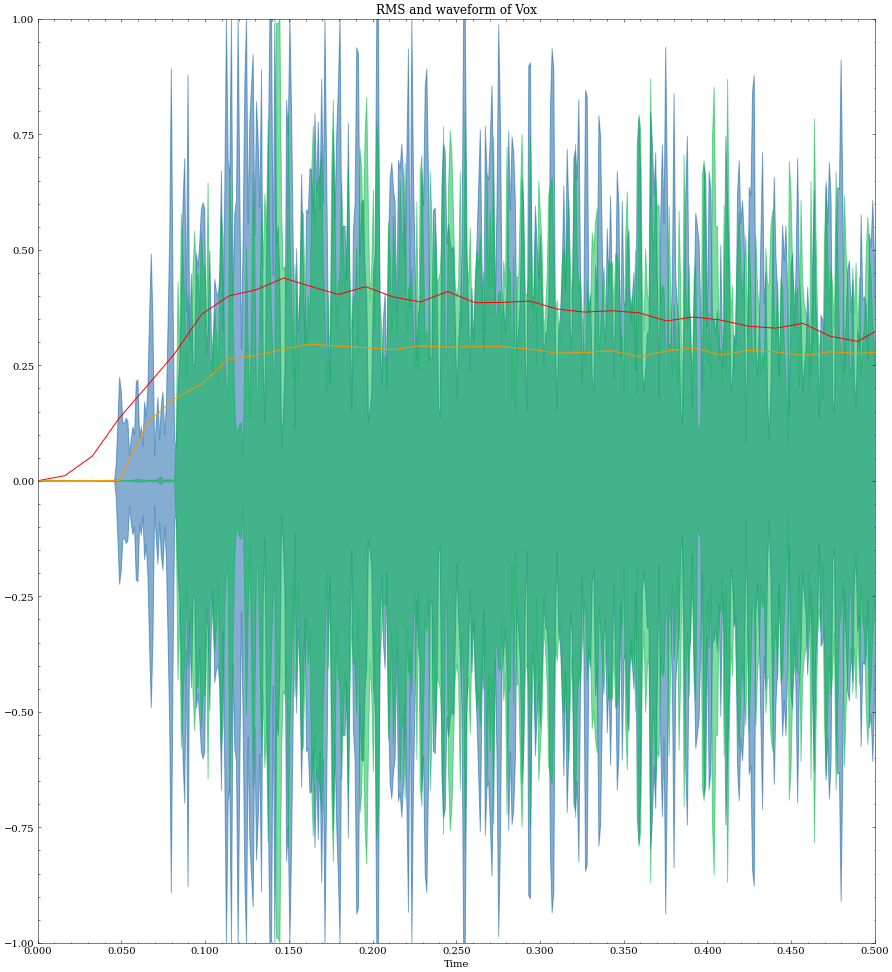

In [24]:
plt.figure(figsize=(15,17))

librosa.display.waveplot(Dry_E_Chord_Hi, alpha=0.5)
librosa.display.waveplot(Vox_Hi_Gain_E_Chord_Hi, alpha=0.5)

plt.plot(t, RMS_Dry_E_Chord_Hi, color="r", marker = "")
plt.plot(t, RMS_Vox_Hi_Gain_E_Chord_Hi, marker = "")
plt.title("RMS and waveform of Vox")
plt.ylim(-1, 1)
plt.xlim(0,0.5)


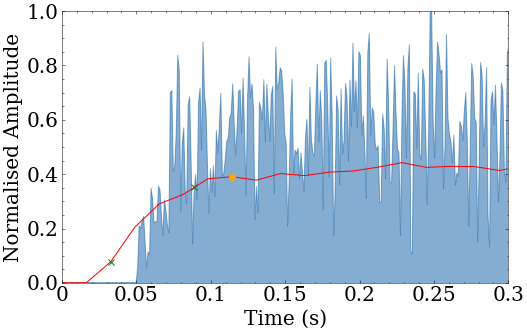

In [27]:
plot_LATRMS(VT40_AC15_E_Chord_Hi,0.1)

In [28]:
logattacktime(VT40_AC15_E_Chord_Hi, 0.1)

[-1.2504801559669927,
 0.08897029579173123,
 0.03279830137175987,
 7,
 0.3906041,
 0.3515436977148056,
 0.07812082171440125]

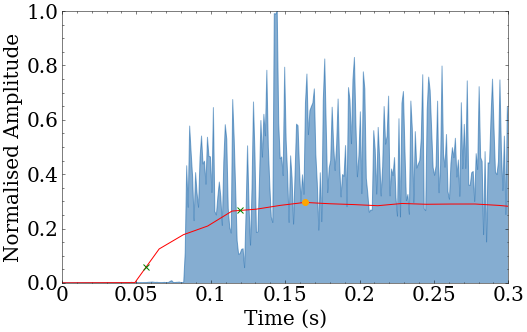

In [29]:
plot_LATRMS(Vox_Hi_Gain_E_Chord_Hi,0.1)

In [30]:
logattacktime(Vox_Hi_Gain_E_Chord_Hi, 0.1)

[-1.2010781665887682,
 0.11959723953026356,
 0.05665795040598388,
 10,
 0.29615802,
 0.26654221415519713,
 0.05923160314559937]

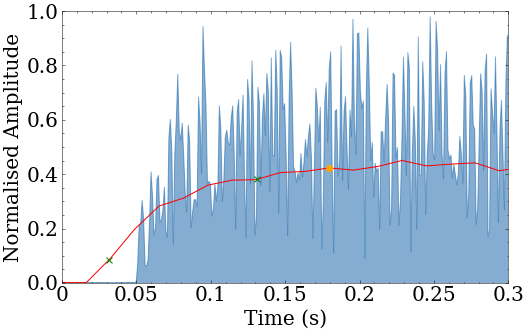

In [31]:
plot_LATRMS(VT40_UKRock_E_Chord_Hi,0.1, dev=3)

In [32]:
logattacktime(VT40_UKRock_E_Chord_Hi, 0.1, dev=3)

[-1.001809391567364,
 0.13108596722864055,
 0.03150172834408211,
 11,
 0.4229851,
 0.38068659603595734,
 0.08459702134132385]

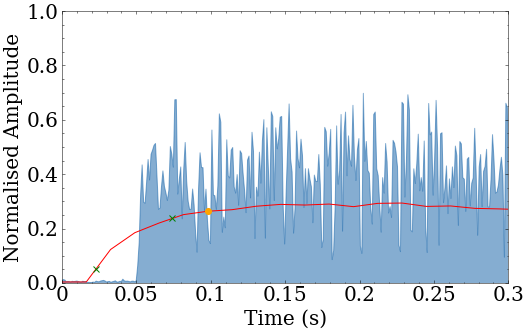

In [33]:
plot_LATRMS(VT40_USMetal_E_Chord_Hi,0.1, dev=5)

In [34]:
logattacktime(VT40_USMetal_E_Chord_Hi, 0.1, dev=5)

[-1.2908922996570378,
 0.07424724067709208,
 0.02306636639242355,
 6,
 0.26361993,
 0.23725793659687042,
 0.052723985910415654]

(0.05, 0.4)

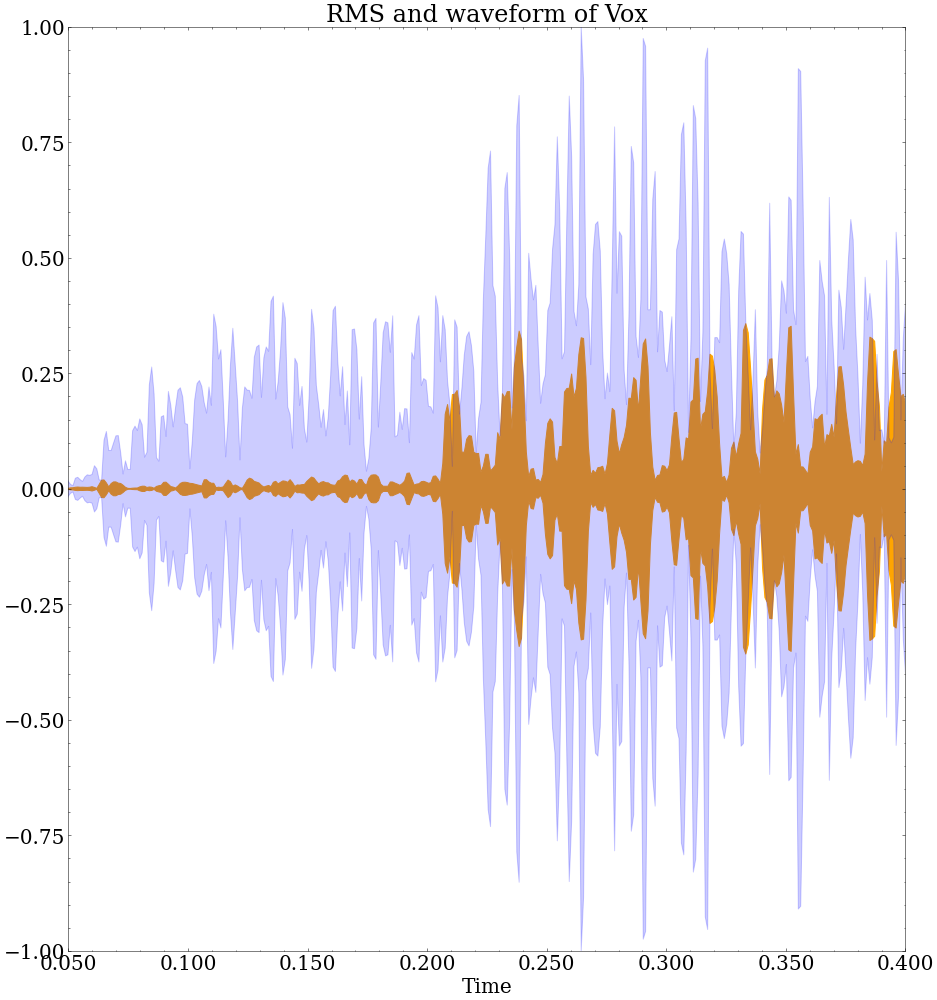

In [35]:
plt.figure(figsize=(15,17))

librosa.display.waveplot(BluesJnr_E_Chord_Lo, color='orange', alpha=1)
librosa.display.waveplot(VT40_USMetal_E_Chord_Lo, color='blue', alpha=0.2)

#plt.plot(t, RMS_Dry_E_Chord_Hi, color="r", marker = "")
#plt.plot(t, RMS_Vox_Hi_Gain_E_Chord_Hi, marker = "")
plt.title("RMS and waveform of Vox")
plt.ylim(-1, 1)
plt.xlim(0.05,0.4)


# E Chord

### Dry High Intensity attack time

In [37]:
logattacktime(Dry_E_Chord_Hi, 0.1, dev=0)[0]

-1.1378255615461799

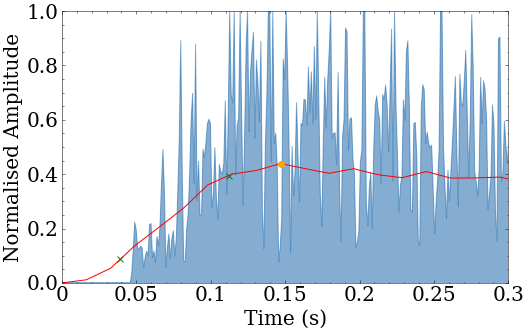

In [38]:
plot_LATRMS(Dry_E_Chord_Hi, 0.1, "Dry High Intensity",dev=0)

### Vox High Gain High Intensity attack time

In [39]:
logattacktime(Vox_Hi_Gain_E_Chord_Hi, 0.25, dev=1)[0]

-1.2540728536889127

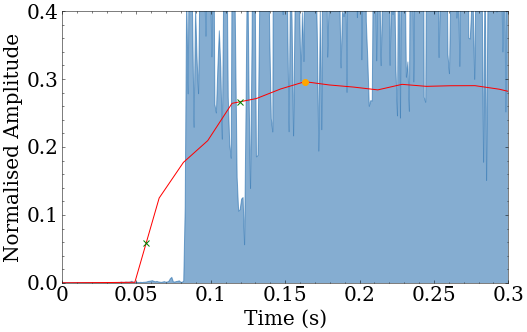

In [40]:
plot_LATRMS(Vox_Hi_Gain_E_Chord_Hi, 0.25, "Vox High Gain Attack Time",ylim=0.4, dev=0)

### JFET High Gain High Intensity attack time

In [41]:
logattacktime(JFET_Hi_Gain_E_Chord_Hi, 0.15, dev=1)[0]

-1.291102045735817

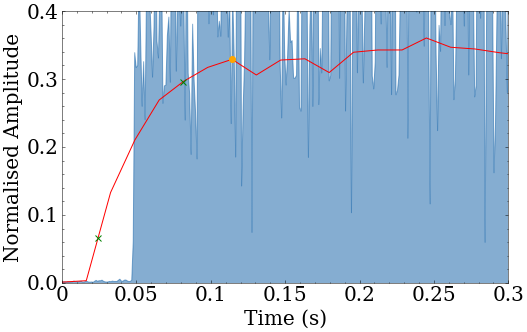

In [42]:
plot_LATRMS(JFET_Hi_Gain_E_Chord_Hi, 0.15, "JFET High Gain Attack Time",ylim=0.4, dev=0)

### Vox Medium Gain High Intensity attack time

In [43]:
logattacktime(Vox_Med_Gain_E_Chord_Hi, 0.1)[0]

-1.2090999172632884

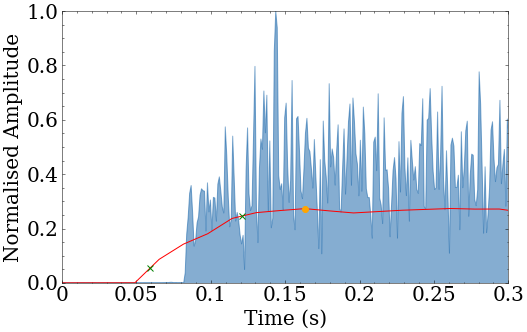

In [44]:
plot_LATRMS(Vox_Med_Gain_E_Chord_Hi, 0.1, "Vox Medium Gain High Intensity attack time", dev=0)

### JFET Medium Gain High Intensity attack time

In [45]:
logattacktime(JFET_Med_Gain_E_Chord_Hi, 0.1)[0]

-1.2471861315683674

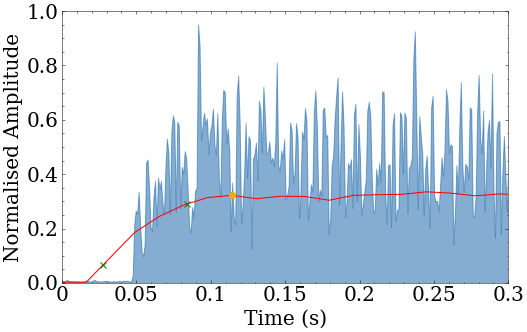

In [46]:
plot_LATRMS(JFET_Med_Gain_E_Chord_Hi, 0.1, "JFET Medium Gain High Intensity attack time", dev=0)

### Vox Low Gain High Intensity attack time

In [47]:
logattacktime(Vox_Low_Gain_E_Chord_Hi, 0.1)[0]

-1.219077087961352

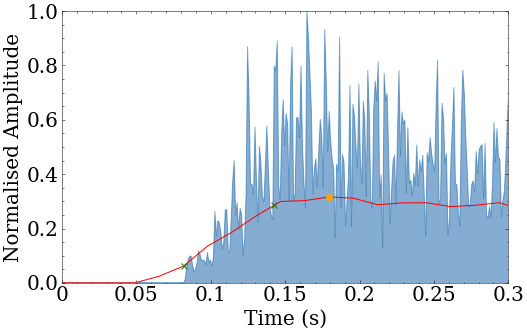

In [48]:
plot_LATRMS(Vox_Low_Gain_E_Chord_Hi, 0.1, "Vox High Gain Attack Time")

### JFET Low Gain High Intensity attack time

In [49]:
logattacktime(JFET_Low_Gain_E_Chord_Hi, 0.1)[0]

-1.2278478926472085

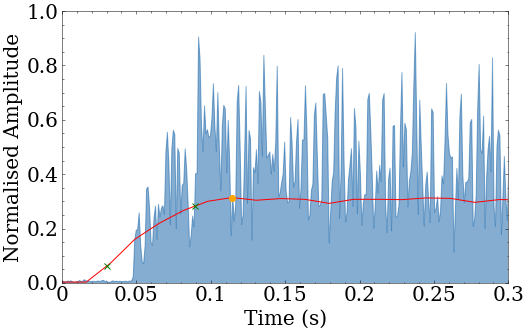

In [50]:
plot_LATRMS(JFET_Low_Gain_E_Chord_Hi, 0.1, "JFET High Gain Attack Time")

### Dry Medium Intensity attack time

In [51]:
logattacktime(Dry_E_Chord_Med, 0.4)[0]

-0.5796127722853172

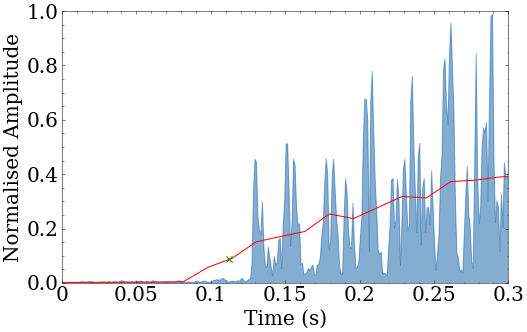

In [52]:
plot_LATRMS(Dry_E_Chord_Med, 0.4)

### Vox High Gain Medium Intensity attack time

In [53]:
logattacktime(Vox_Hi_Gain_E_Chord_Med, 0.3)[0]

-1.292728561216662

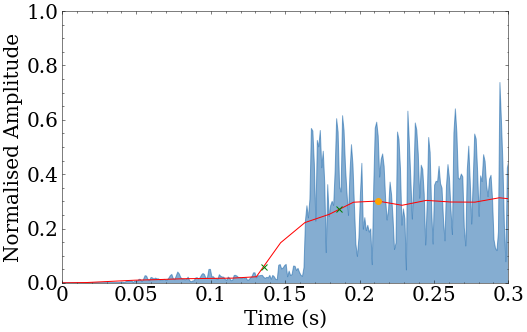

In [54]:
plot_LATRMS(Vox_Hi_Gain_E_Chord_Med, 0.3, "Vox High Gain Medium Intensity Log Attack Time")

### JFET High Gain Medium Intensity attack time

In [55]:
logattacktime(JFET_Hi_Gain_E_Chord_Med, 0.3)[0]

-0.9914050238317461

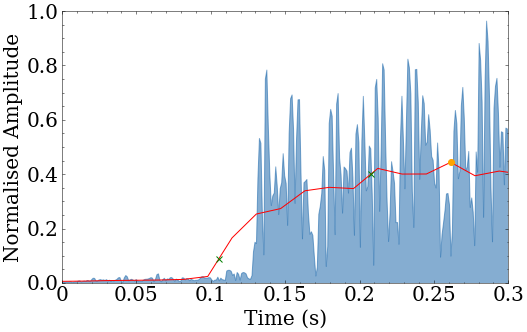

In [56]:
plot_LATRMS(JFET_Hi_Gain_E_Chord_Med, 0.3, "JFET High Gain Medium Intensity Log Attack Time")

### Vox Medium Gain Medium Intensity attack time

In [57]:
logattacktime(Vox_Med_Gain_E_Chord_Med, 0.3)[0]

-0.980303597922364

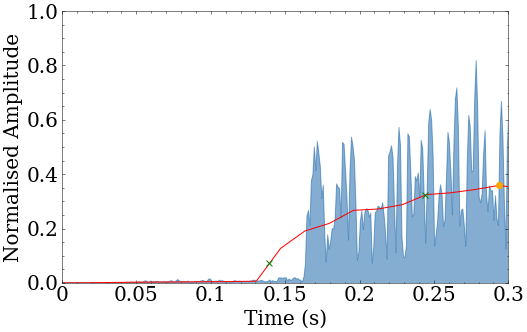

In [58]:
plot_LATRMS(Vox_Med_Gain_E_Chord_Med, 0.3, "Vox High Gain Medium Intensity Log Attack Time", dev=0)

### JFET Medium Gain Medium Intensity attack time

In [59]:
logattacktime(JFET_Med_Gain_E_Chord_Med, 0.3)[0]

-0.8478573773632972

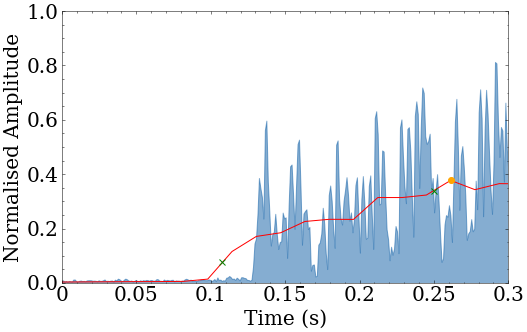

In [60]:
plot_LATRMS(JFET_Med_Gain_E_Chord_Med, 0.3, "JFET High Gain Medium Intensity Log Attack Time", dev=0)

### Vox Low Gain Medium Intensity attack time

In [61]:
logattacktime(Vox_Low_Gain_E_Chord_Med, 0.3)[0]

-0.8407212725105386

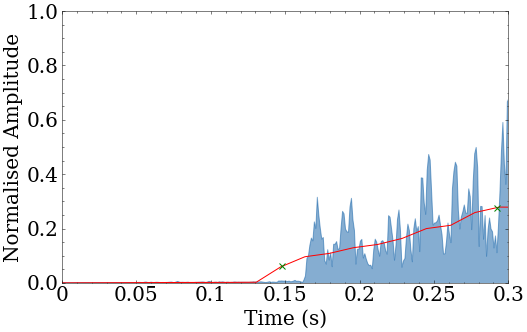

In [62]:
plot_LATRMS(Vox_Low_Gain_E_Chord_Med, 0.3, "Vox High Gain Medium Intensity Log Attack Time")

### JFET Low Gain Medium Intensity attack time

In [63]:
logattacktime(JFET_Low_Gain_E_Chord_Med, 0.3)[0]

-0.8449925800063992

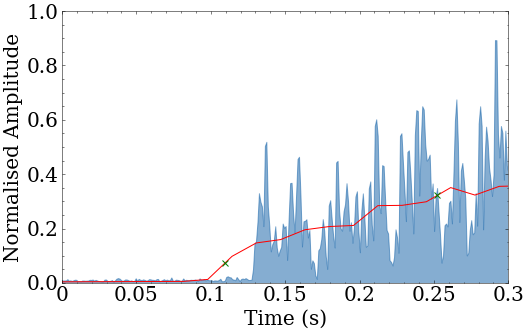

In [64]:
plot_LATRMS(JFET_Low_Gain_E_Chord_Med, 0.3, "JFET High Gain Medium Intensity Log Attack Time")

### Dry Low Intensity

In [65]:
logattacktime(Dry_E_Chord_Lo, 0.32, dev=-6)[0]

-0.32043108924009006

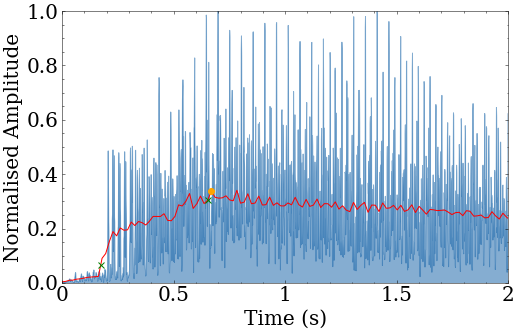

In [66]:
plot_LATRMS(Dry_E_Chord_Lo,0.32, xlim=2, dev=-6)

### Vox High Gain Low Intensity

In [67]:
logattacktime(Vox_Hi_Gain_E_Chord_Lo, 0.4)[0]

-0.7391746742121301

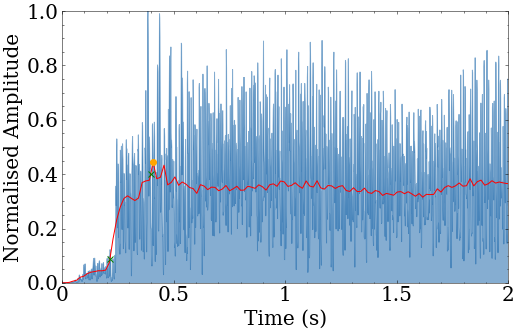

In [68]:
plot_LATRMS(Vox_Hi_Gain_E_Chord_Lo, 0.4, xlim=2)

### JFET High Gain Low Intensity

In [69]:
logattacktime(JFET_Hi_Gain_E_Chord_Lo, 0.2)[0]

-1.1549219089352136

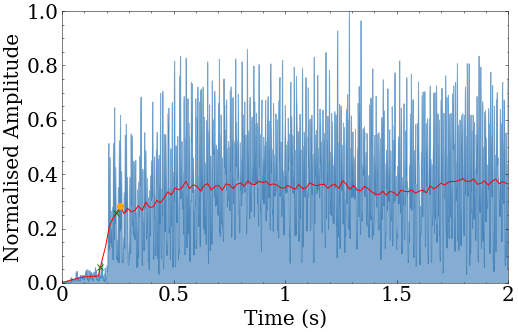

In [70]:
plot_LATRMS(JFET_Hi_Gain_E_Chord_Lo, 0.2, xlim=2)

### Vox Medium Gain Low Intensity

In [71]:
logattacktime(Vox_Med_Gain_E_Chord_Lo, 0.1, dev=-15)[0]

-0.48602072902604776

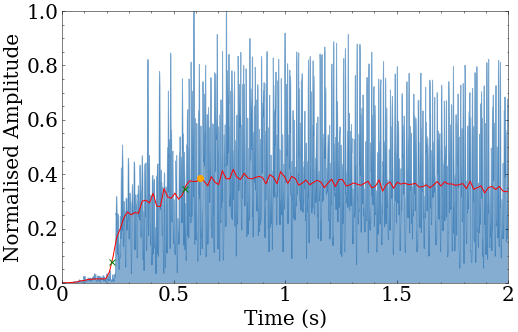

In [72]:
plot_LATRMS(Vox_Med_Gain_E_Chord_Lo, 0.1, xlim=2, dev=-15)

### JFET Medium Gain Low Intensity

In [73]:
logattacktime(JFET_Med_Gain_E_Chord_Lo, 0.1, dev=-15)[0]

-0.4575606812928369

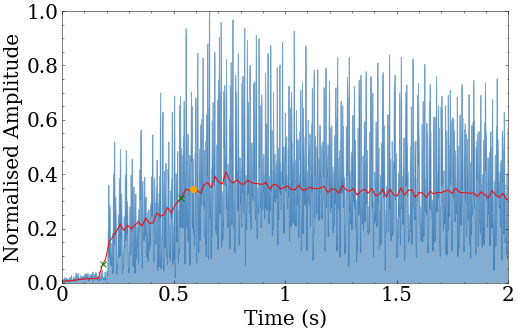

In [74]:
plot_LATRMS(JFET_Med_Gain_E_Chord_Lo, 0.1, xlim=2, dev=-15)

### Vox Low Gain Low Intensity

In [75]:
logattacktime(Vox_Low_Gain_E_Chord_Lo, 0.1, dev=-19)[0]

-0.3211403389549431

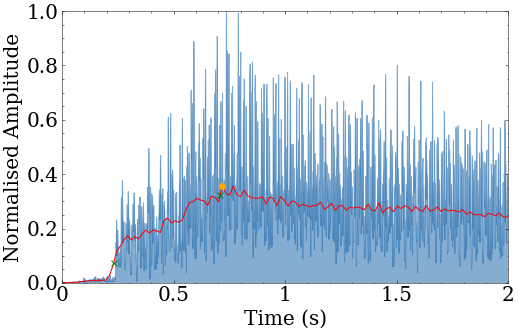

In [76]:
plot_LATRMS(Vox_Low_Gain_E_Chord_Lo, 0.1, xlim=2, dev=-19)

### JFET Low Gain Low Intensity

In [77]:
logattacktime(JFET_Low_Gain_E_Chord_Lo, 0.1, dev=-24)[0]

-0.2789298384519473

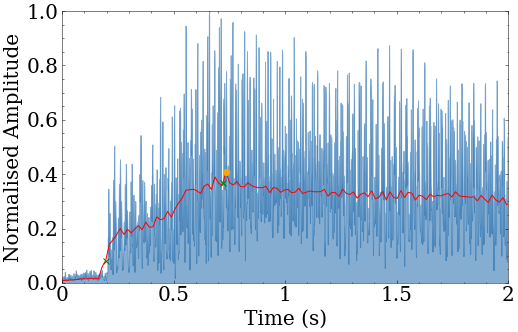

In [78]:
plot_LATRMS(JFET_Low_Gain_E_Chord_Lo, 0.1, xlim=2, dev=-24)

# E2 String

### Dry High Intensity

In [79]:
logattacktime(Dry_E2_String_Hi, 0.2)[0]

-1.2606612386579912

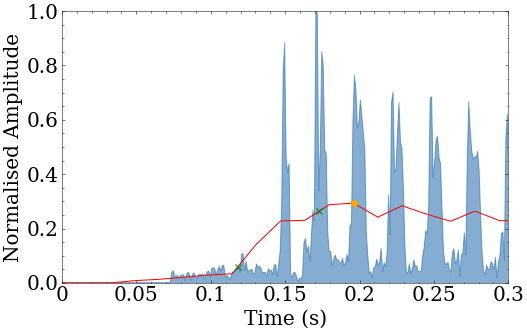

In [80]:
plot_LATRMS(Dry_E2_String_Hi, 0.2, "Dry High Intensity")

### Vox High Gain High Intensity

In [81]:
logattacktime(Vox_Hi_Gain_E2_String_Hi, 0.3)[0]

-1.0167841904022055

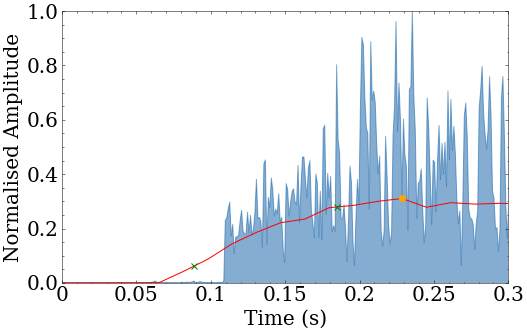

In [82]:
plot_LATRMS(Vox_Hi_Gain_E2_String_Hi, 0.3, "Dry High Intensity")

### JFET High Gain High Intensity

In [83]:
logattacktime(JFET_Hi_Gain_E2_String_Hi, 0.3)[0]

-0.9823650376579894

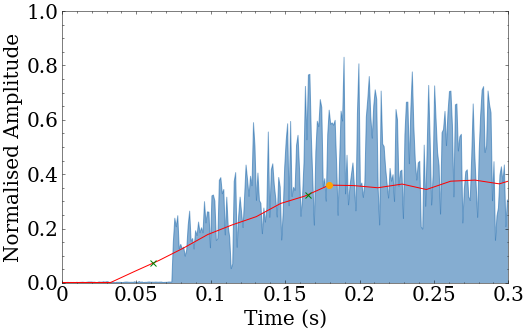

In [84]:
plot_LATRMS(JFET_Hi_Gain_E2_String_Hi, 0.3, "Dry High Intensity")

### Vox Medium Gain High Intensity

In [85]:
logattacktime(Vox_Med_Gain_E2_String_Hi, 0.3)[0]

-1.0859650253525956

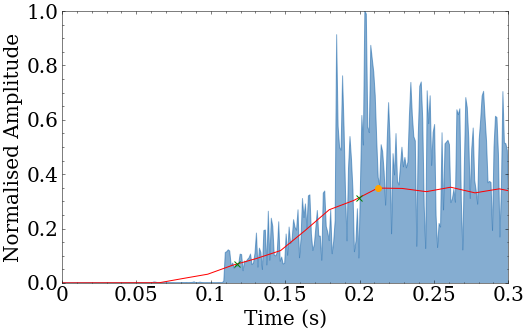

In [86]:
plot_LATRMS(Vox_Med_Gain_E2_String_Hi, 0.3, "Vox Medium Gain High Intensity")

### JFET Medium Gain High Intensity

In [87]:
logattacktime(JFET_Med_Gain_E2_String_Hi, 0.3, dev=3)[0]

-1.0767297622185958

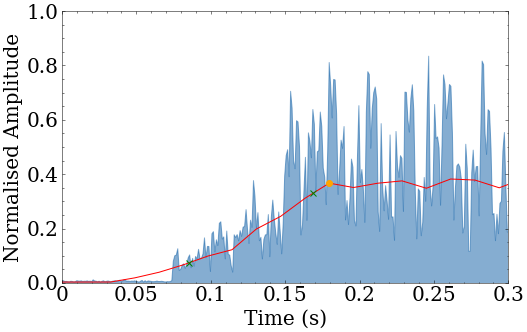

In [88]:
plot_LATRMS(JFET_Med_Gain_E2_String_Hi, 0.3, "JFET Medium Gain High Intensity", dev=3)

### Vox Low Gain High Intensity

In [89]:
logattacktime(Vox_Low_Gain_E2_String_Hi, 0.1, dev=1)[0]

-1.2678763321441164

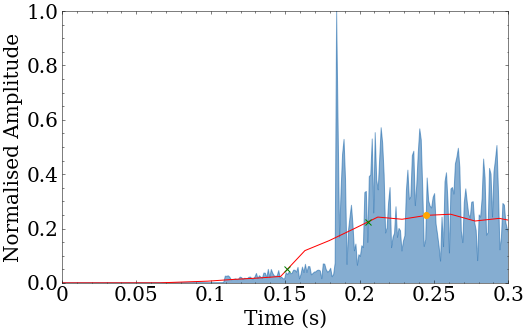

In [90]:
plot_LATRMS(Vox_Low_Gain_E2_String_Hi, 0.1, "Dry High Intensity", dev=1)

### JFET Low Gain High Intensity

In [91]:
logattacktime(JFET_Low_Gain_E2_String_Hi, 0.1, dev=3)[0]

-1.126072636976526

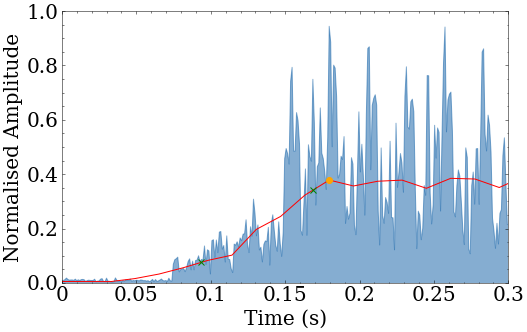

In [92]:
plot_LATRMS(JFET_Low_Gain_E2_String_Hi, 0.1, "Dry High Intensity", dev=3)

### Dry Medium Intensity

In [93]:
logattacktime(Dry_E2_String_Med, 0.2)[0]

-1.1768598968210238

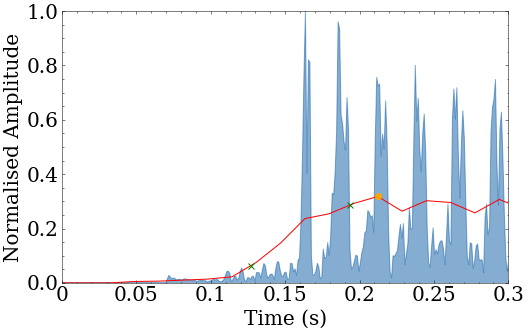

In [94]:
plot_LATRMS(Dry_E2_String_Med, 0.2, "Dry High Intensity")

### Vox High Gain Medium Intensity

In [95]:
logattacktime(Vox_Hi_Gain_E2_String_Med, 0.2)[0]

-1.06622503248405

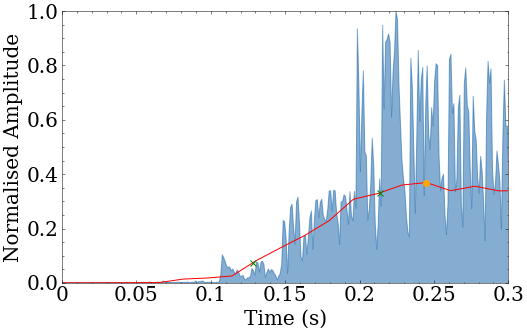

In [96]:
plot_LATRMS(Vox_Hi_Gain_E2_String_Med, 0.2, "Dry High Intensity")

### JFET High Gain Medium Intensity

In [97]:
logattacktime(JFET_Hi_Gain_E2_String_Med, 0.2)[0]

-1.110148505818132

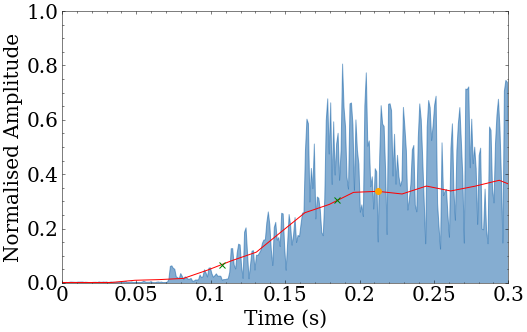

In [98]:
plot_LATRMS(JFET_Hi_Gain_E2_String_Med, 0.2, "Dry High Intensity")

### Vox Medium Gain Medium Intensity

In [99]:
logattacktime(Vox_Med_Gain_E2_String_Med, 0.3, dev=3)[0]

-1.2816387964215206

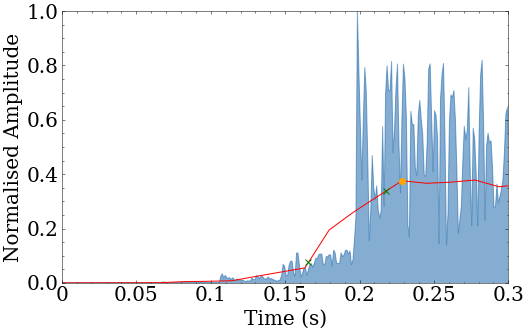

In [100]:
plot_LATRMS(Vox_Med_Gain_E2_String_Med, 0.2, "Dry High Intensity", dev=3)

### JFET Medium Gain Medium Intensity

In [101]:
logattacktime(JFET_Med_Gain_E2_String_Med, 0.2)[0]

-1.2675628418405274

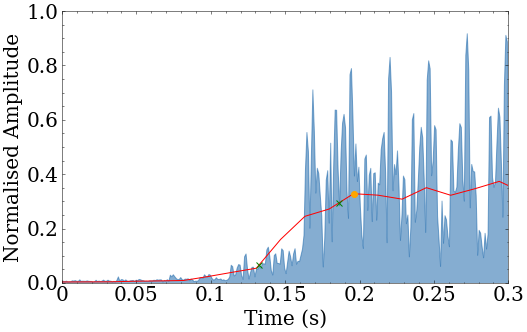

In [102]:
plot_LATRMS(JFET_Med_Gain_E2_String_Med, 0.2, "Dry High Intensity")

### Vox Low Gain Medium Intensity

In [103]:
logattacktime(Vox_Low_Gain_E2_String_Med, 0.2)[0]

-1.2903606927838835

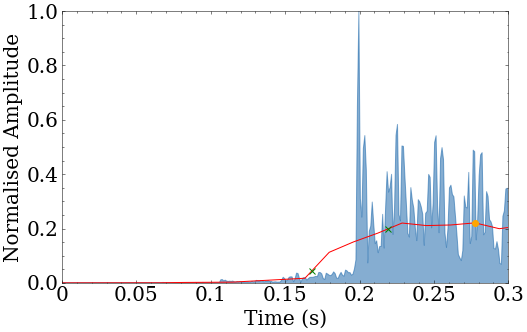

In [104]:
plot_LATRMS(Vox_Low_Gain_E2_String_Med, 0.2, "Dry High Intensity")

### JFET Low Gain Medium Intensity

In [105]:
logattacktime(JFET_Low_Gain_E2_String_Med, 0.2)[0]

-1.2732836796879572

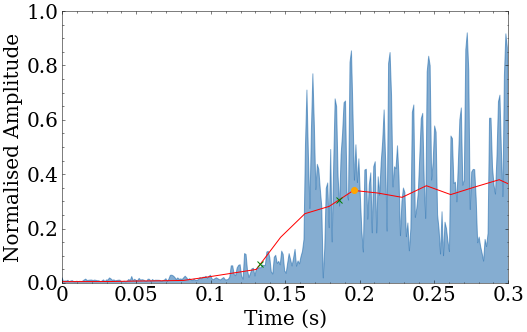

In [106]:
plot_LATRMS(JFET_Low_Gain_E2_String_Med, 0.2, "Dry High Intensity")

### Dry E2 Low Intensity

In [107]:
logattacktime(Dry_E2_String_Lo, 0.2)[0]

-1.0860465665630645

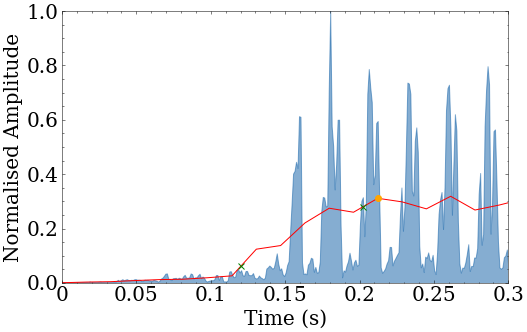

In [108]:
plot_LATRMS(Dry_E2_String_Lo, 0.2, "Dry High Intensity")

### Vox High Gain E2 Low Intensity

In [109]:
logattacktime(Vox_Hi_Gain_E2_String_Lo, 0.2)[0]

-1.1659682558436013

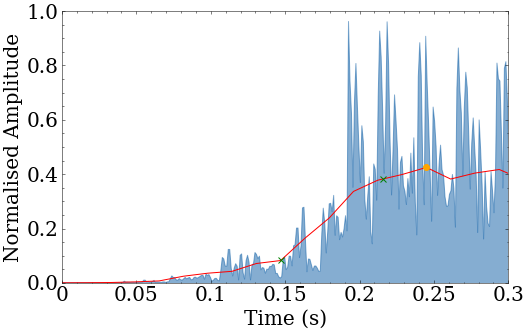

In [110]:
plot_LATRMS(Vox_Hi_Gain_E2_String_Lo, 0.2, "Dry High Intensity")

### JFET High Gain E2 Low Intensity

In [111]:
logattacktime(JFET_Hi_Gain_E2_String_Lo, 0.2)[0]

-1.1557882465202787

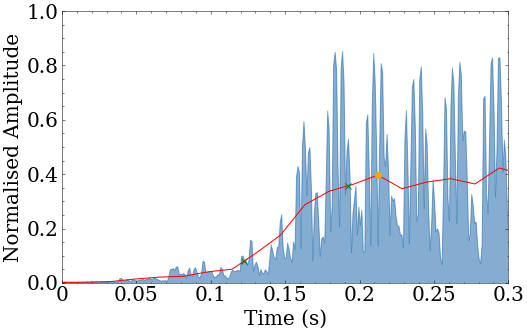

In [112]:
plot_LATRMS(JFET_Hi_Gain_E2_String_Lo, 0.2, "Dry High Intensity")

### Vox Medium Gain E2 Low Intensity

In [113]:
logattacktime(Vox_Med_Gain_E2_String_Lo, 0.2)[0]

-1.176987651929594

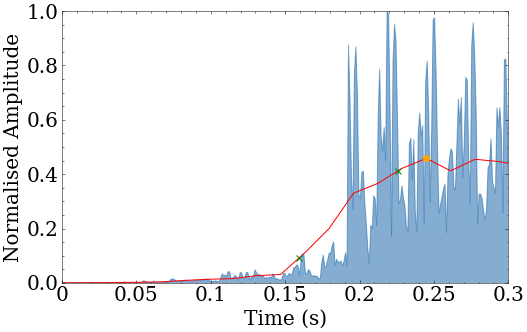

In [114]:
plot_LATRMS(Vox_Med_Gain_E2_String_Lo, 0.2, "Dry High Intensity")

### JFET Medium Gain E2 Low Intensity

In [115]:
logattacktime(JFET_Med_Gain_E2_String_Lo, 0.2)[0]

-1.1278022126353109

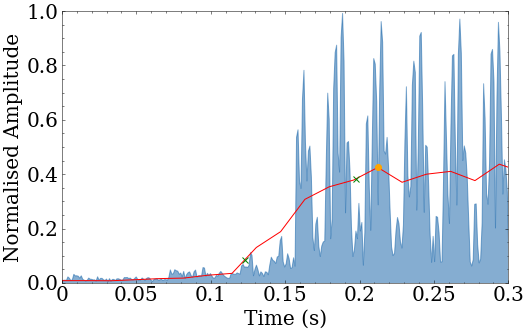

In [116]:
plot_LATRMS(JFET_Med_Gain_E2_String_Lo, 0.2, "Dry High Intensity")

### Vox Low Gain E2 Low Intensity

In [117]:
logattacktime(Vox_Low_Gain_E2_String_Lo, 0.2)[0]

-1.1798880806640903

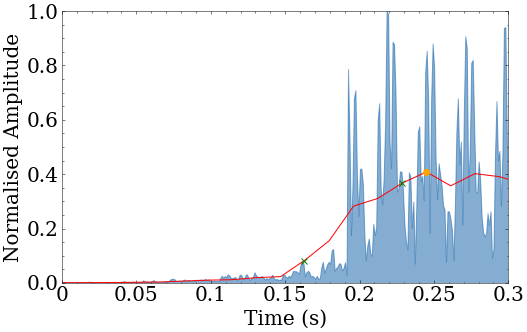

In [118]:
plot_LATRMS(Vox_Low_Gain_E2_String_Lo, 0.2, "Vox Low Gain E2 Low Intensity")

### JFET Low Gain E2 Low Intensity

In [119]:
logattacktime(JFET_Low_Gain_E2_String_Lo, 0.2)[0]

-1.123941397472983

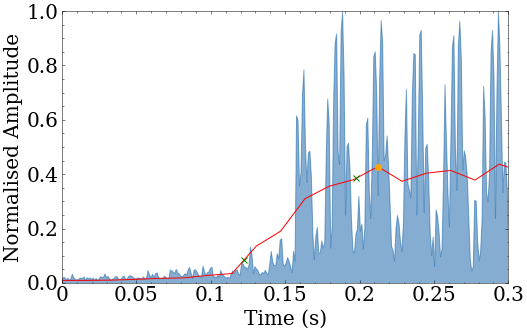

In [120]:
plot_LATRMS(JFET_Low_Gain_E2_String_Lo, 0.2, "JFET Low Gain E2 Low Intensity")

# E4 String

### Dry E4 High Intensity

In [121]:
logattacktime(Dry_E4_String_Hi, 0.1)[0]

-1.3241049386992385

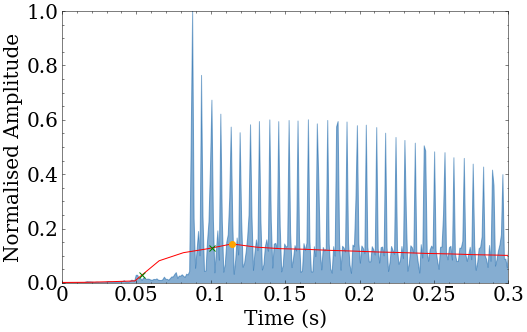

In [122]:
plot_LATRMS(Dry_E4_String_Hi, 0.1, "Dry High Intensity", xlim=0.3)

### Vox High Gain E4 High Intensity

In [123]:
logattacktime(Vox_Hi_Gain_E4_String_Hi, 0.1)[0]

-1.2384763991714896

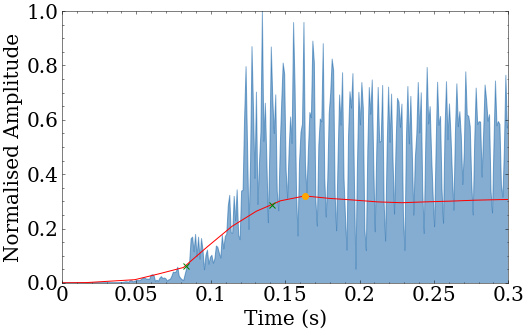

In [124]:
plot_LATRMS(Vox_Hi_Gain_E4_String_Hi, 0.1, "Dry High Intensity", xlim=0.3)

### JFET High Gain E4 High Intensity

In [125]:
logattacktime(JFET_Hi_Gain_E4_String_Hi, 0.1)[0]

-1.2596180453637427

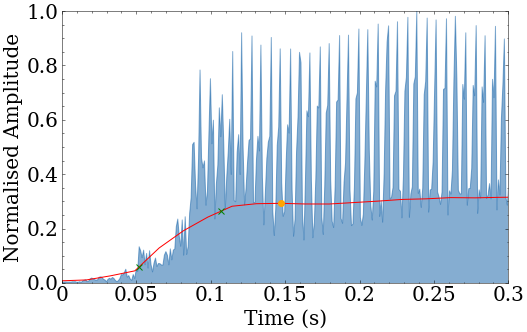

In [126]:
plot_LATRMS(JFET_Hi_Gain_E4_String_Hi, 0.1, "Dry High Intensity", xlim=0.3)

### Vox Medium Gain E4 High Intensity

In [127]:
logattacktime(Vox_Med_Gain_E4_String_Hi, 0.1)[0]

-1.280026226074508

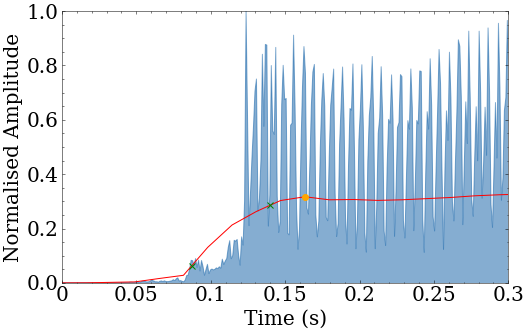

In [128]:
plot_LATRMS(Vox_Med_Gain_E4_String_Hi, 0.1, "Dry High Intensity")

### JFET Medium Gain E4 High Intensity

In [129]:
logattacktime(JFET_Med_Gain_E4_String_Hi, 0.1)[0]

-1.140663761341851

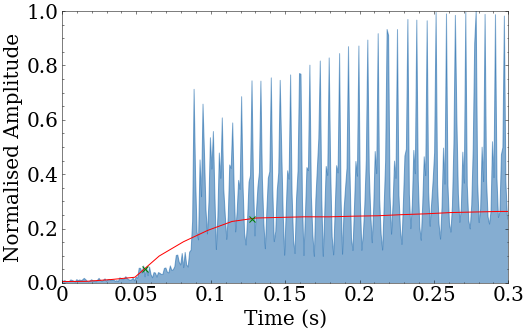

In [130]:
plot_LATRMS(JFET_Med_Gain_E4_String_Hi, 0.1, "Dry High Intensity")

### Vox Low Gain E4 High Intensity

In [131]:
logattacktime(Vox_Low_Gain_E4_String_Hi, 0.1)[0]

-1.338740442254513

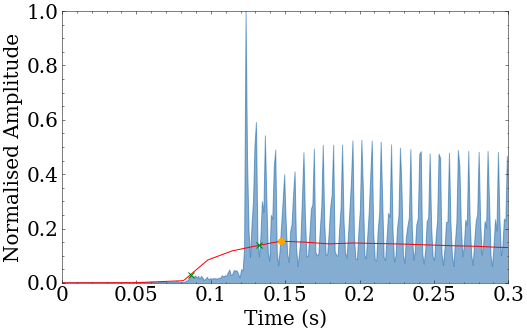

In [132]:
plot_LATRMS(Vox_Low_Gain_E4_String_Hi, 0.1, "Dry High Intensity")

### JFET Low Gain E4 High Intensity

In [133]:
logattacktime(JFET_Low_Gain_E4_String_Hi, 0.1)[0]

-1.2313191625379978

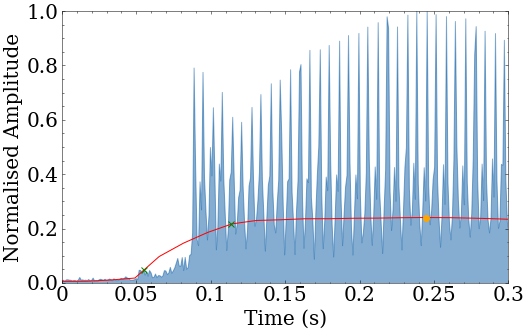

In [134]:
plot_LATRMS(JFET_Low_Gain_E4_String_Hi, 0.1, "Dry High Intensity")

### Dry E4 Medium Intensity

In [135]:
logattacktime(Dry_E4_String_Med, 0.2)[0]

-1.286337829148494

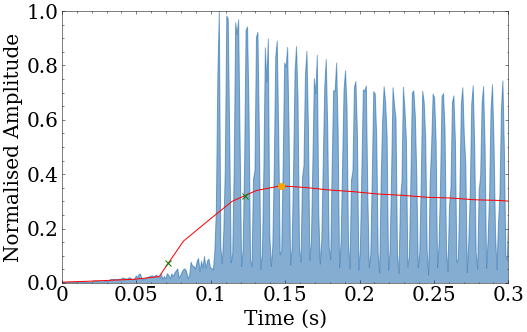

In [136]:
plot_LATRMS(Dry_E4_String_Med, 0.2, "Dry E4 Medium Intensity")

### Vox High Gain E4 Medium Intensity

In [137]:
logattacktime(Vox_Hi_Gain_E4_String_Med, 0.2, dev=16)[0]

-1.2658512199842562

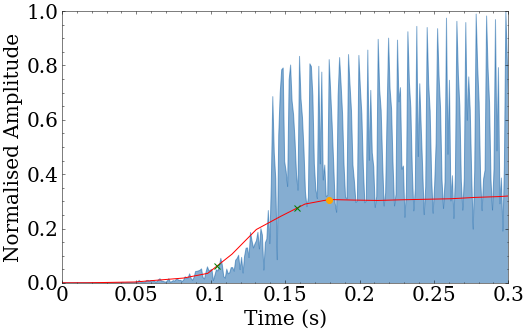

In [138]:
plot_LATRMS(Vox_Hi_Gain_E4_String_Med, 0.2, "Dry High Intensity", dev=16)

### JFET High Gain E4 Medium Intensity

In [139]:
logattacktime(JFET_Hi_Gain_E4_String_Med, 0.2)[0]

-1.2918262120285524

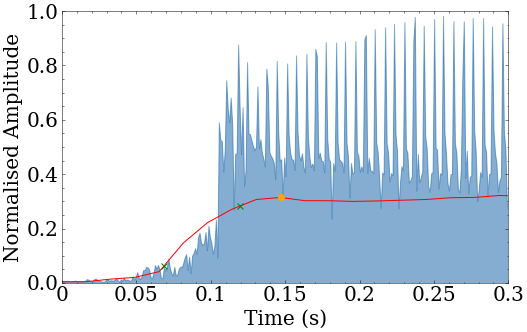

In [140]:
plot_LATRMS(JFET_Hi_Gain_E4_String_Med, 0.2, "Dry High Intensity")

### Vox Medium Gain E4 Medium Intensity

In [141]:
logattacktime(Vox_Med_Gain_E4_String_Med, 0.2)[0]

-1.2901435027971175

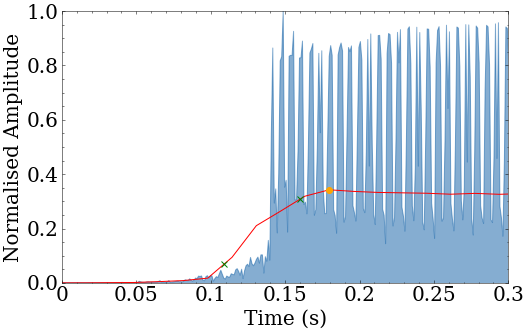

In [142]:
plot_LATRMS(Vox_Med_Gain_E4_String_Med, 0.2, "Dry High Intensity")

### JFET Medium Gain E4 Medium Intensity

In [143]:
logattacktime(JFET_Med_Gain_E4_String_Med, 0.2)[0]

-1.279456722965698

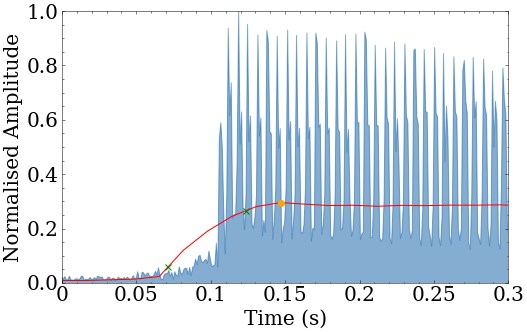

In [144]:
plot_LATRMS(JFET_Med_Gain_E4_String_Med, 0.2, "Dry High Intensity")

### Vox Low Gain E4 Medium Intensity

In [145]:
logattacktime(Vox_Low_Gain_E4_String_Med, 0.2)[0]

-1.2926380856370665

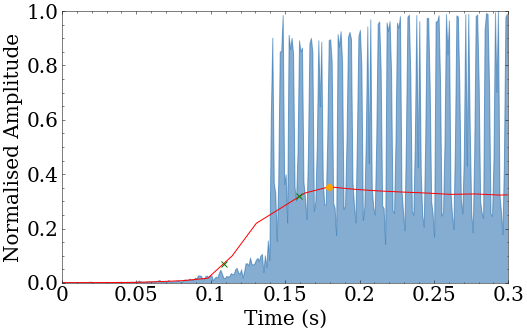

In [146]:
plot_LATRMS(Vox_Low_Gain_E4_String_Med, 0.2, "Vox Low Gain E4 Medium Intensity")

### JFET Low Gain E4 Medium Intensity

In [147]:
logattacktime(JFET_Low_Gain_E4_String_Med, 0.2)[0]

-1.2827200140102126

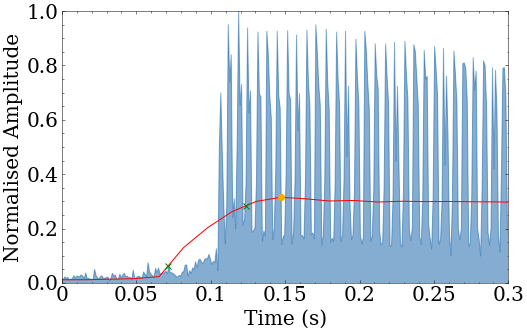

In [148]:
plot_LATRMS(JFET_Low_Gain_E4_String_Med, 0.2, "JFET Low Gain E4 Medium Intensity")

### Dry E4 Low Intensity

In [149]:
logattacktime(Dry_E4_String_Lo, 0.1)[0]

-1.2375513041292123

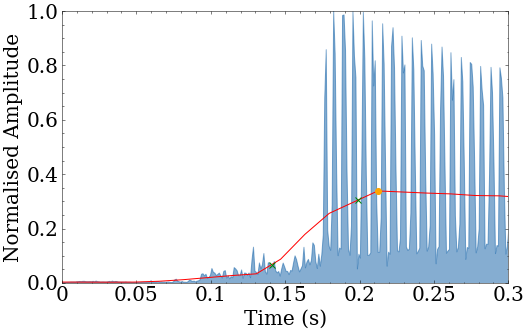

In [150]:
plot_LATRMS(Dry_E4_String_Lo, 0.1, "Dry High Intensity")

### Vox High Gain E4 Low Intensity

In [151]:
logattacktime(Vox_Hi_Gain_E4_String_Lo, 0.05)[0]

-1.1882747968024496

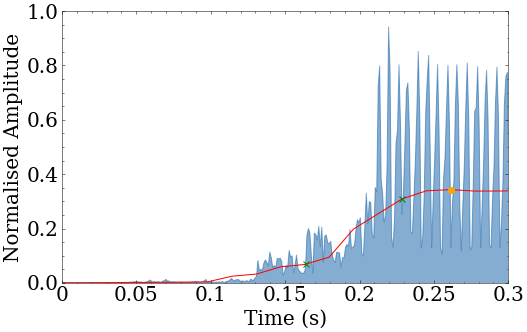

In [152]:
plot_LATRMS(Vox_Hi_Gain_E4_String_Lo, 0.05, "Dry High Intensity")

### JFET High Gain E4 Low Intensity

In [153]:
logattacktime(JFET_Hi_Gain_E4_String_Lo, 0.05)[0]

-1.1112387642325396

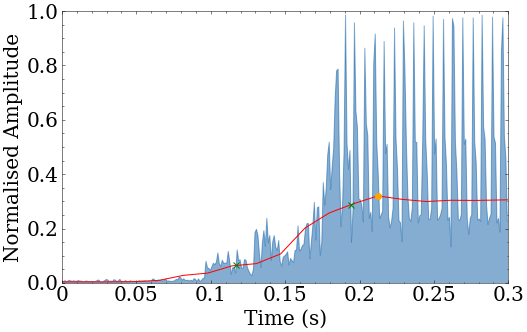

In [154]:
plot_LATRMS(JFET_Hi_Gain_E4_String_Lo, 0.05, "Dry High Intensity")

### Vox Medium Gain E4 Low Intensity

In [155]:
logattacktime(Vox_Med_Gain_E4_String_Lo, 0.05, dev=1)[0]

-1.3219876143552705

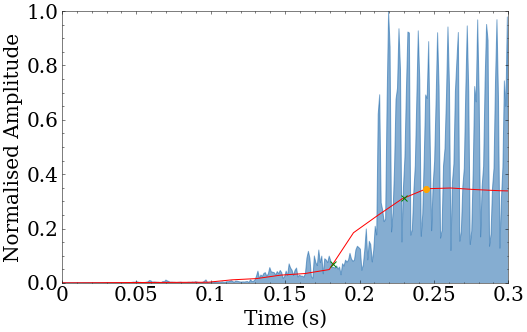

In [156]:
plot_LATRMS(Vox_Med_Gain_E4_String_Lo, 0.05, "Vox Medium Gain E4 Low Intensity", dev=1)

### JFET Medium Gain E4 Low Intensity

In [157]:
logattacktime(JFET_Med_Gain_E4_String_Lo, 0.05, dev=0)[0]

-1.255637692816514

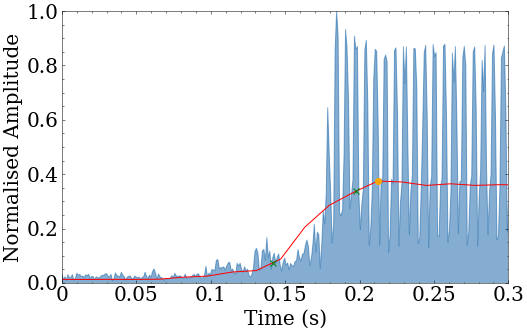

In [158]:
plot_LATRMS(JFET_Med_Gain_E4_String_Lo, 0.05, "JFET Medium Gain E4 Low Intensity", dev=0)

### Vox Low Gain E4 Low Intensity

In [159]:
logattacktime(Vox_Low_Gain_E4_String_Lo, 0.05, dev=1)[0]

-1.3199528167133023

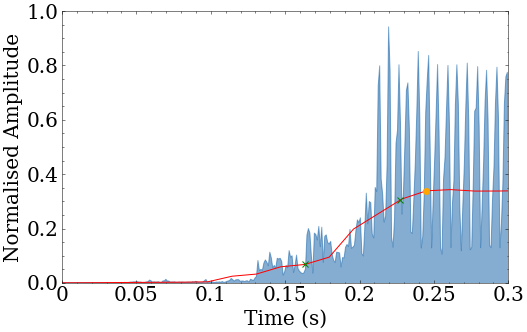

In [160]:
plot_LATRMS(Vox_Hi_Gain_E4_String_Lo, 0.05, "Vox Medium Gain E4 Low Intensity", dev=1)

### JFET Low Gain E4 Low Intensity

In [161]:
logattacktime(JFET_Low_Gain_E4_String_Lo, 0.05, dev=0)[0]

-1.2501999409632218

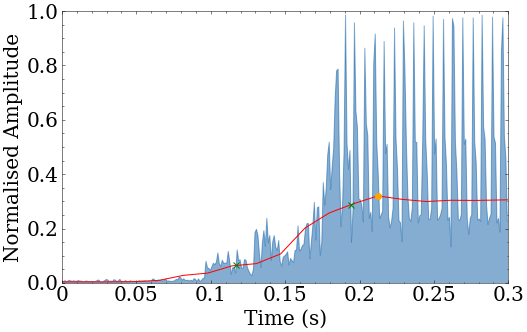

In [162]:
plot_LATRMS(JFET_Hi_Gain_E4_String_Lo, 0.05, "JFET Medium Gain E4 Low Intensity", dev=0)

# D Chord

### Dry High Intensity attack time

In [163]:
logattacktime(Dry_D_Chord_Hi, 0.2)[0]

-1.013255808494974

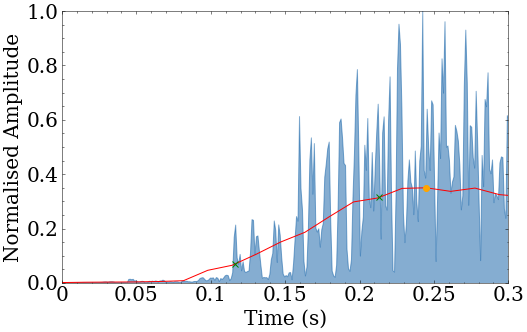

In [164]:
plot_LATRMS(Dry_D_Chord_Hi, 0.2, "Dry High Intensity")

### Vox High Gain High Intensity attack time

In [165]:
logattacktime(Vox_Hi_Gain_D_Chord_Hi, 0.25)[0]

-1.1950675149908598

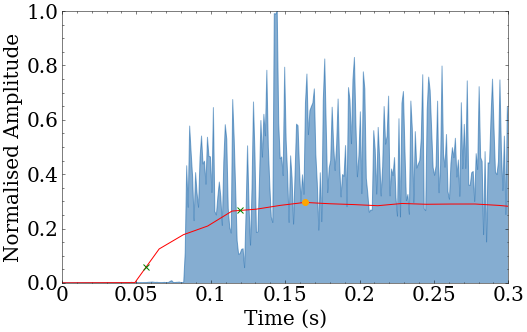

In [166]:
plot_LATRMS(Vox_Hi_Gain_E_Chord_Hi, 0.25, "Vox High Gain Attack Time")

### JFET High Gain High Intensity attack time

In [167]:
logattacktime(JFET_Hi_Gain_D_Chord_Hi, 0.25)[0]

-1.2771364007272201

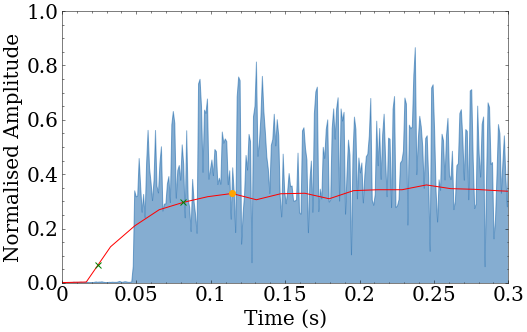

In [168]:
plot_LATRMS(JFET_Hi_Gain_E_Chord_Hi, 0.25, "JFET High Gain Attack Time")

### Vox Medium Gain High Intensity attack time

In [169]:
logattacktime(Vox_Med_Gain_D_Chord_Hi, 0.1)[0]

-0.969240386286357

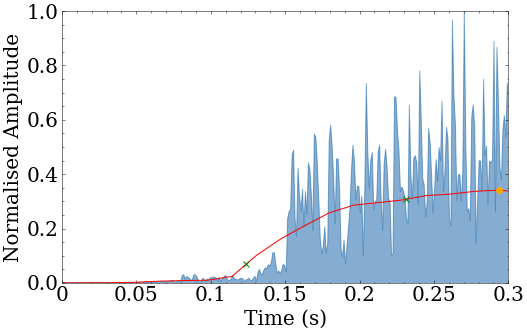

In [170]:
plot_LATRMS(Vox_Med_Gain_D_Chord_Hi, 0.1, "Vox High Gain Attack Time")

### JFET Medium Gain High Intensity attack time

In [171]:
logattacktime(JFET_Med_Gain_D_Chord_Hi, 0.1)[0]

-0.8843263884783434

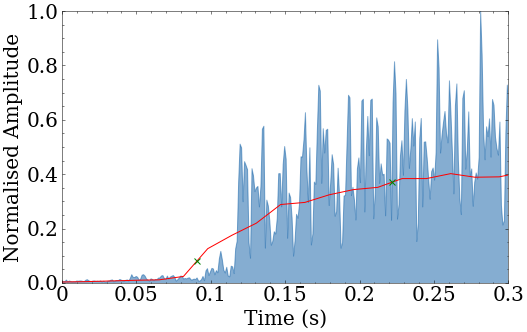

In [172]:
plot_LATRMS(JFET_Med_Gain_D_Chord_Hi, 0.1, "JFET High Gain Attack Time")

### Vox Low Gain High Intensity attack time

In [173]:
logattacktime(Vox_Low_Gain_D_Chord_Hi, 0.1)[0]

-1.025594529041412

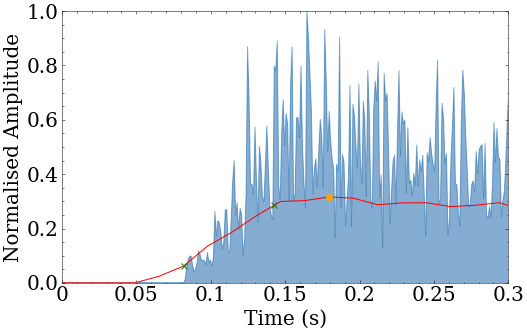

In [174]:
plot_LATRMS(Vox_Low_Gain_E_Chord_Hi, 0.1, "Vox High Gain Attack Time")

### JFET Low Gain High Intensity attack time

In [175]:
logattacktime(JFET_Low_Gain_D_Chord_Hi, 0.1)[0]

-0.8944727545514749

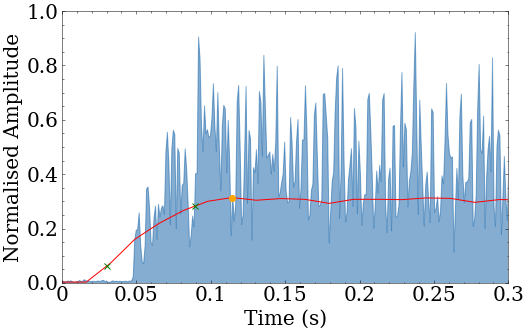

In [176]:
plot_LATRMS(JFET_Low_Gain_E_Chord_Hi, 0.1, "JFET High Gain Attack Time")

### Dry Medium Intensity attack time

In [177]:
logattacktime(Dry_D_Chord_Med, 0.1)[0]

-0.6181021749137251

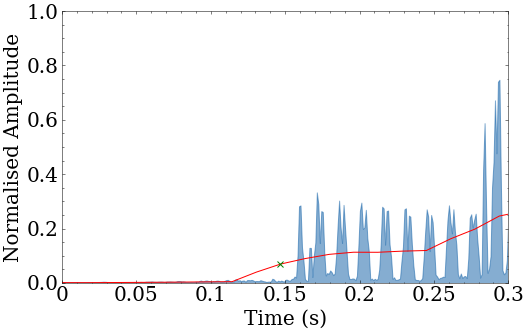

In [178]:
plot_LATRMS(Dry_D_Chord_Med, 0.1)

### Vox High Gain Medium Intensity attack time

In [179]:
logattacktime(Vox_Hi_Gain_D_Chord_Med, 0.3)[0]

-1.3124919907875952

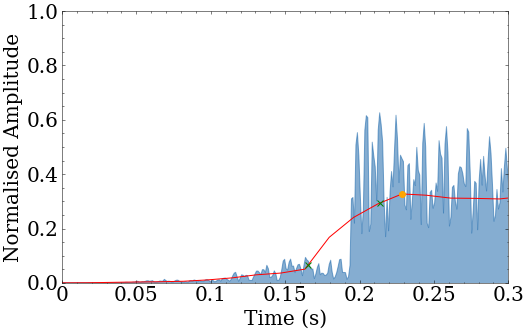

In [180]:
plot_LATRMS(Vox_Hi_Gain_D_Chord_Med, 0.3, "Vox High Gain Medium Intensity Log Attack Time")

### JFET High Gain Medium Intensity attack time

In [181]:
logattacktime(JFET_Hi_Gain_D_Chord_Med, 0.3)[0]

-1.2920623219048695

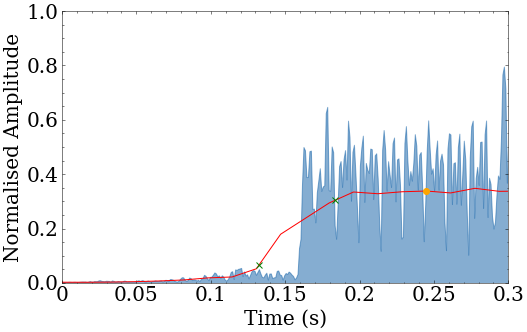

In [182]:
plot_LATRMS(JFET_Hi_Gain_D_Chord_Med, 0.3, "JFET High Gain Medium Intensity Log Attack Time")

### Vox Medium Gain Medium Intensity attack time

In [183]:
logattacktime(Vox_Med_Gain_D_Chord_Med, 0.3, dev=5)[0]

-0.8160990661069872

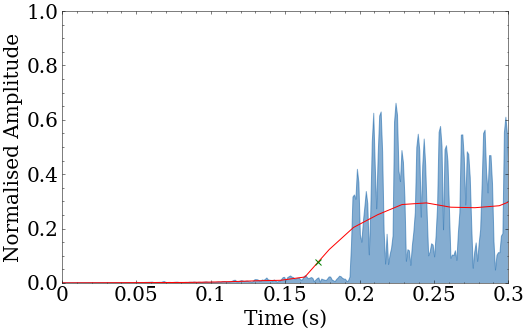

In [184]:
plot_LATRMS(Vox_Med_Gain_D_Chord_Med, 0.3, "Vox High Gain Medium Intensity Log Attack Time", dev=5)

### JFET Medium Gain Medium Intensity attack time

In [185]:
logattacktime(JFET_Med_Gain_D_Chord_Med, 0.3, dev=0)[0]

-0.7935443525941548

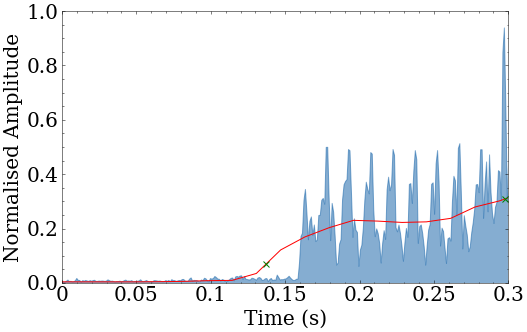

In [186]:
plot_LATRMS(JFET_Med_Gain_D_Chord_Med, 0.3, "JFET High Gain Medium Intensity Log Attack Time", dev=0)

### Vox Low Gain Medium Intensity attack time

In [187]:
logattacktime(Vox_Low_Gain_D_Chord_Med, 0.1, dev=-13)[0]

-0.6610005700935339

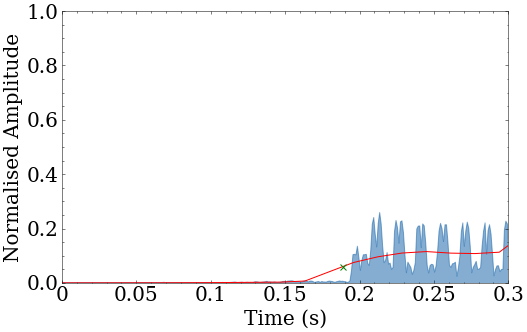

In [188]:
plot_LATRMS(Vox_Low_Gain_D_Chord_Med, 0.1, "Vox High Gain Medium Intensity Log Attack Time", dev=-13)

### JFET Low Gain Medium Intensity attack time

In [189]:
logattacktime(JFET_Low_Gain_D_Chord_Med, 0.1, dev=-13)[0]

-0.7755662376577329

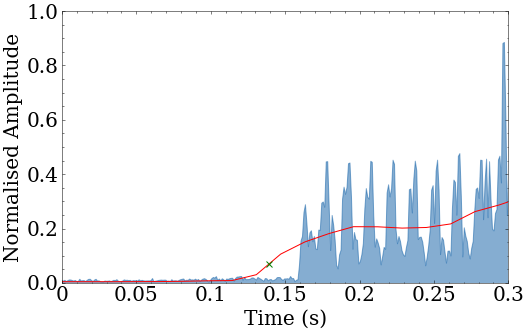

In [190]:
plot_LATRMS(JFET_Low_Gain_D_Chord_Med, 0.1, "JFET High Gain Medium Intensity Log Attack Time", dev=-13)

### Dry Low Intensity

In [191]:
logattacktime(Dry_D_Chord_Lo, 0.32)[0]

-0.6797523553146386

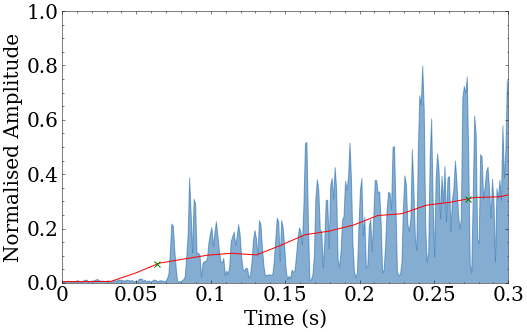

In [192]:
plot_LATRMS(Dry_D_Chord_Lo,0.32)

### Vox High Gain Low Intensity

In [193]:
logattacktime(Vox_Hi_Gain_D_Chord_Lo, 0.4, dev=1)[0]

-0.8623326946295692

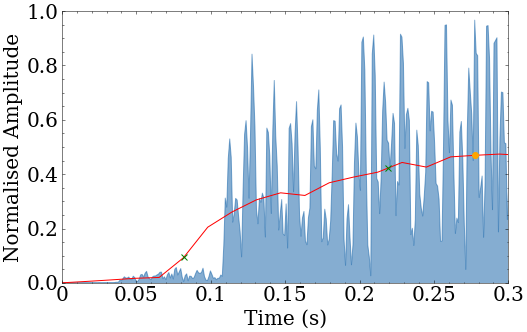

In [194]:
plot_LATRMS(Vox_Hi_Gain_D_Chord_Lo, 0.4, dev=1)

### JFET High Gain Low Intensity

In [195]:
logattacktime(JFET_Hi_Gain_D_Chord_Lo, 0.4, dev=0)[0]

-0.7183137843117238

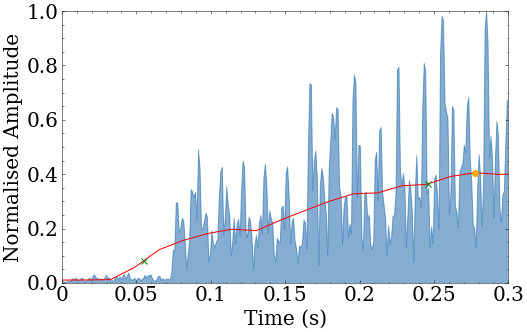

In [196]:
plot_LATRMS(JFET_Hi_Gain_D_Chord_Lo, 0.4, dev=0)

### Vox Medium Gain Low Intensity

In [197]:
logattacktime(Vox_Med_Gain_D_Chord_Lo, 0.1, dev=2)[0]

-0.7337075717297974

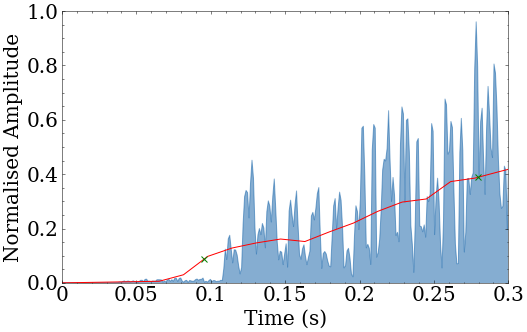

In [198]:
plot_LATRMS(Vox_Med_Gain_D_Chord_Lo, 0.1, dev=2)

### JFET Medium Gain Low Intensity

In [199]:
logattacktime(JFET_Med_Gain_D_Chord_Lo, 0.1, dev=0)[0]

-0.702529990881664

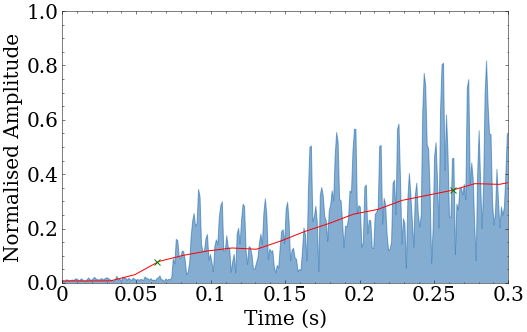

In [200]:
plot_LATRMS(JFET_Med_Gain_D_Chord_Lo, 0.1, dev=0)

### Vox Low Gain Low Intensity

In [201]:
logattacktime(Vox_Low_Gain_D_Chord_Lo, 0.1, dev=2)[0]

-0.7194878096313183

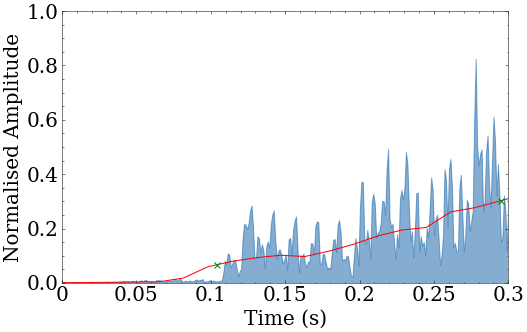

In [202]:
plot_LATRMS(Vox_Low_Gain_D_Chord_Lo, 0.1, dev=2)

### JFET Low Gain Low Intensity

In [203]:
logattacktime(JFET_Low_Gain_D_Chord_Lo, 0.1, dev=2)[0]

-0.7059727031553457

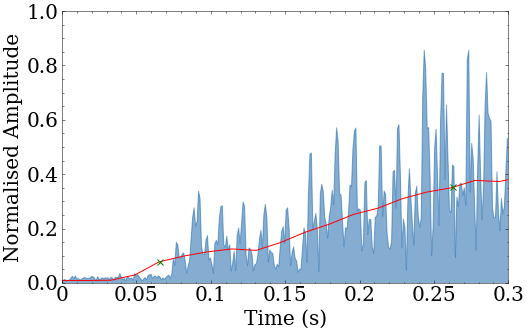

In [204]:
plot_LATRMS(JFET_Low_Gain_D_Chord_Lo, 0.1, dev=2)

# D3 String

### Dry D3 High Intensity

In [205]:
logattacktime(Dry_D3_String_Hi, 0.1)[0]

-1.309688341766038

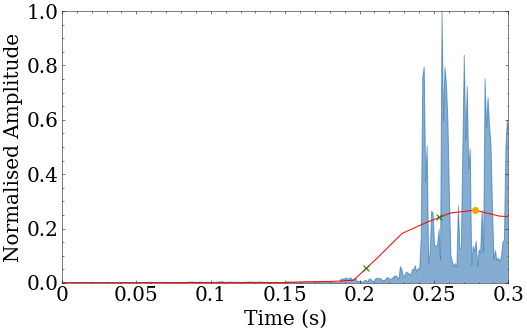

In [206]:
plot_LATRMS(Dry_D3_String_Hi, 0.1, "Dry High Intensity")

### Vox High Gain D3 High Intensity

In [207]:
logattacktime(Vox_Hi_Gain_D3_String_Hi, 0.1, dev=3)[0]

-1.2064520294257193

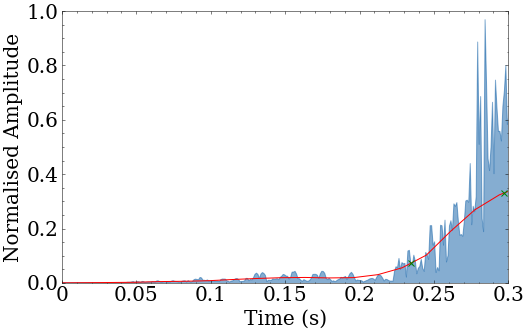

In [208]:
plot_LATRMS(Vox_Hi_Gain_D3_String_Hi, 0.1, "Dry High Intensity", dev=3)

### JFET High Gain D3 High Intensity

In [209]:
logattacktime(JFET_Hi_Gain_D3_String_Hi, 0.1, dev=0)[0]

-1.2231114710076096

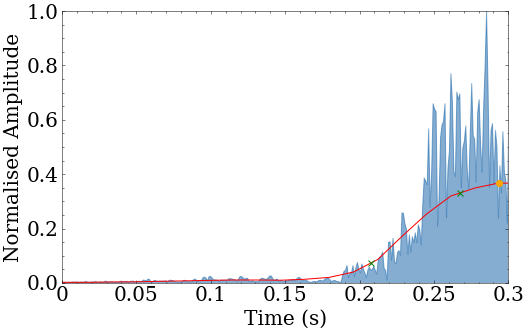

In [210]:
plot_LATRMS(JFET_Hi_Gain_D3_String_Hi, 0.1, "Dry High Intensity", dev=0)

### Vox Medium Gain D3 High Intensity

In [211]:
logattacktime(Vox_Med_Gain_D3_String_Hi, 0.1, dev=1)[0]

-1.335303788643121

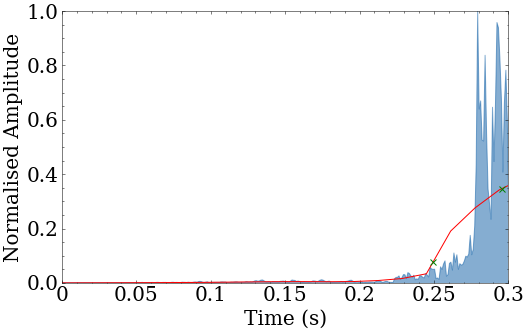

In [212]:
plot_LATRMS(Vox_Med_Gain_D3_String_Hi, 0.1, "Dry High Intensity", dev=1)

### JFET Medium Gain D3 High Intensity

In [213]:
logattacktime(JFET_Med_Gain_D3_String_Hi, 0.1, dev=0)[0]

-1.30570723270531

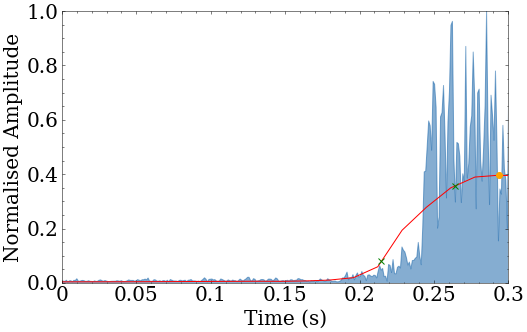

In [214]:
plot_LATRMS(JFET_Med_Gain_D3_String_Hi, 0.1, "Dry High Intensity", dev=0)

### Vox Low Gain D3 High Intensity

In [215]:
logattacktime(Vox_Low_Gain_D3_String_Hi, 0.1, dev=1)[0]

-1.3581841703084163

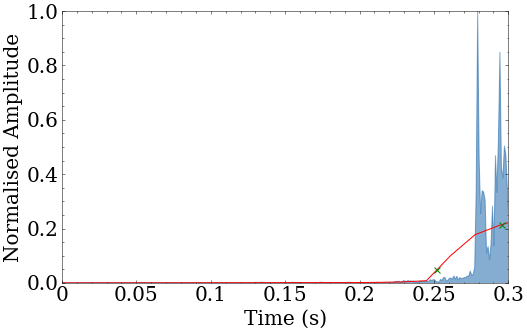

In [216]:
plot_LATRMS(Vox_Low_Gain_D3_String_Hi, 0.1, "Dry High Intensity", dev=1)

### JFET Low Gain D3 High Intensity

In [217]:
logattacktime(JFET_Low_Gain_D3_String_Hi, 0.1, dev=0)[0]

-1.3300841908830008

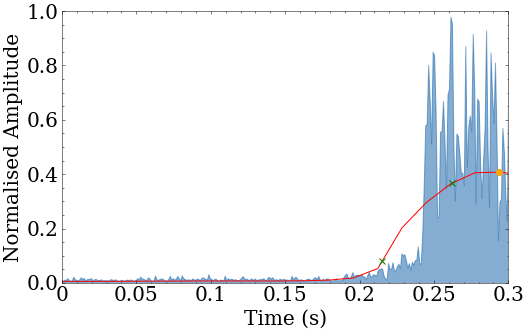

In [218]:
plot_LATRMS(JFET_Low_Gain_D3_String_Hi, 0.1, "Dry High Intensity", dev=0)

### Dry D3 Medium Intensity

In [219]:
logattacktime(Dry_D3_String_Med, 0.2, dev=6)[0]

-1.2653169162360591

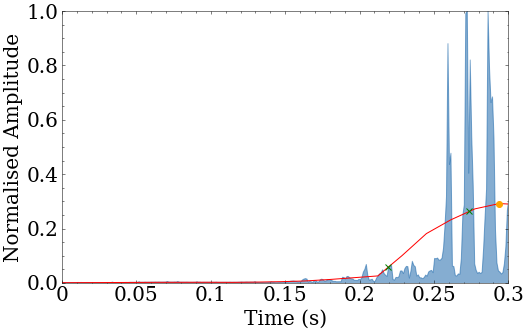

In [220]:
plot_LATRMS(Dry_D3_String_Med, 0.2, "Dry D3 Medium Intensity", dev=6)

### Vox High Gain D3 Medium Intensity

In [221]:
logattacktime(Vox_Hi_Gain_D3_String_Med, 0.2)[0]

-1.0911018119092921

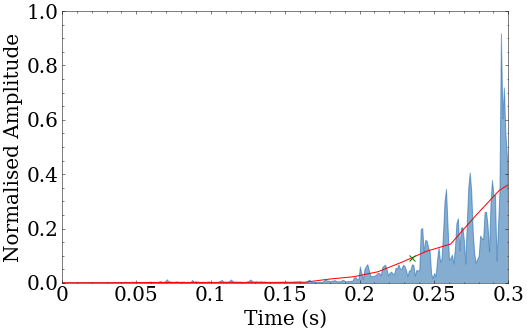

In [222]:
plot_LATRMS(Vox_Hi_Gain_D3_String_Med, 0.2, "Dry High Intensity")

### JFET High Gain D3 Medium Intensity

In [223]:
logattacktime(JFET_Hi_Gain_D3_String_Med, 0.2)[0]

-1.2776693689283611

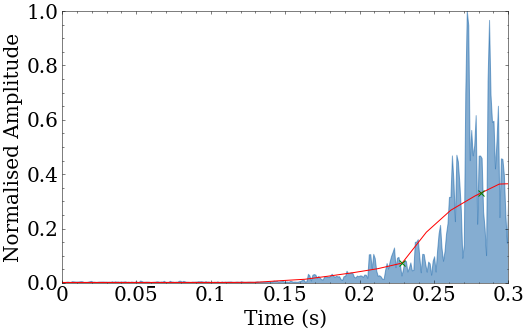

In [224]:
plot_LATRMS(JFET_Hi_Gain_D3_String_Med, 0.2, "Dry High Intensity")

### Vox Medium Gain D3 Medium Intensity

In [225]:
logattacktime(Vox_Med_Gain_D3_String_Med, 0.2)[0]

-1.2676233868223405

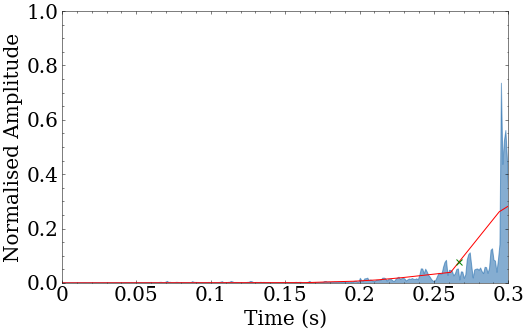

In [226]:
plot_LATRMS(Vox_Med_Gain_D3_String_Med, 0.2, "Dry High Intensity")

### JFET Medium Gain D3 Medium Intensity

In [227]:
logattacktime(JFET_Med_Gain_D3_String_Med, 0.2)[0]

-1.2937635143560373

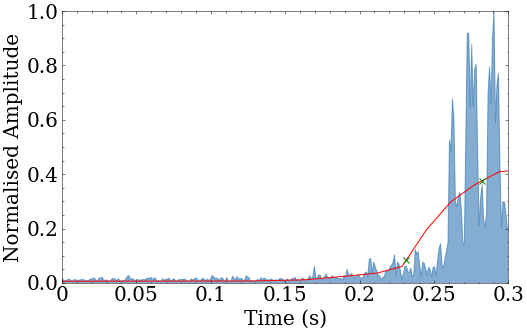

In [228]:
plot_LATRMS(JFET_Med_Gain_D3_String_Med, 0.2, "Dry High Intensity")

### Vox Low Gain D3 Medium Intensity

In [229]:
logattacktime(Vox_Low_Gain_D3_String_Med, 0.2)[0]

-1.2840622427855903

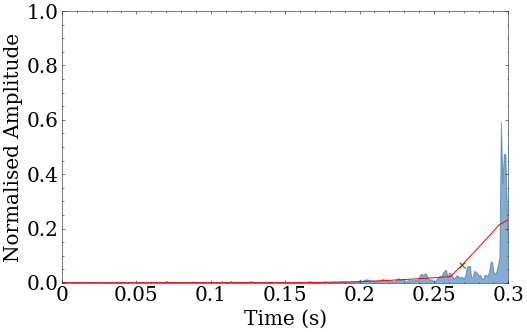

In [230]:
plot_LATRMS(Vox_Low_Gain_D3_String_Med, 0.2, "Vox Low Gain D3 Medium Intensity")

### JFET Low Gain D3 Medium Intensity

In [231]:
logattacktime(JFET_Low_Gain_D3_String_Med, 0.2)[0]

-1.285526023641423

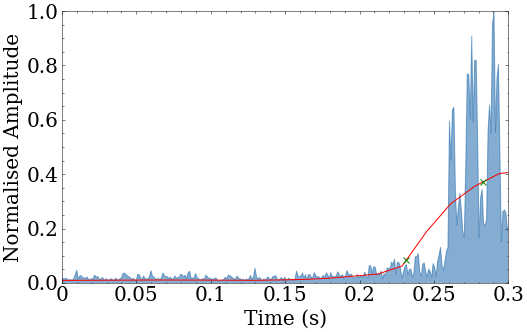

In [232]:
plot_LATRMS(JFET_Low_Gain_D3_String_Med, 0.2, "JFET Low Gain D3 Medium Intensity")

### Dry D3 Low Intensity

In [233]:
logattacktime(Dry_D3_String_Lo, 0.1, dev=2)[0]

-1.2102082091158897

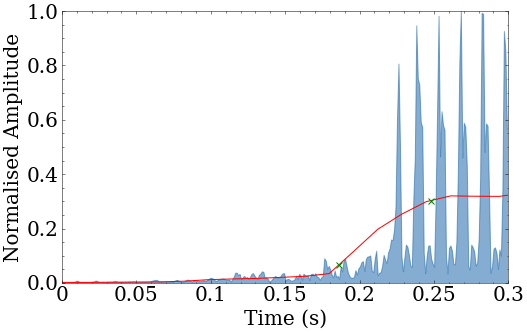

In [234]:
plot_LATRMS(Dry_D3_String_Lo, 0.1, "Dry High Intensity", dev=2)

### Vox High Gain D3 Low Intensity

In [235]:
logattacktime(Vox_Hi_Gain_D3_String_Lo, 0.05)[0]

-1.1397016593903873

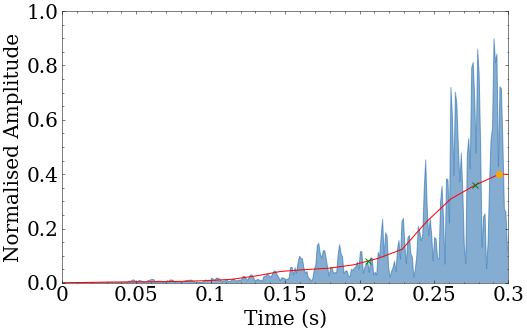

In [236]:
plot_LATRMS(Vox_Hi_Gain_D3_String_Lo, 0.05, "Dry High Intensity")

### JFET High Gain D3 Low Intensity

In [237]:
logattacktime(JFET_Hi_Gain_D3_String_Lo, 0.05)[0]

-1.2492880276626754

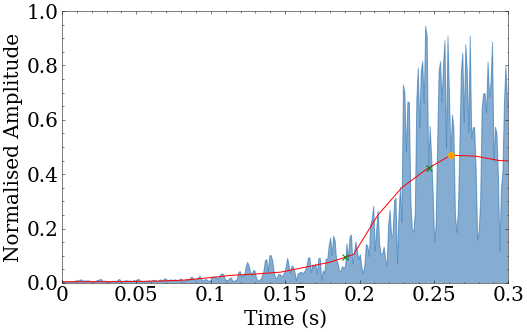

In [238]:
plot_LATRMS(JFET_Hi_Gain_D3_String_Lo, 0.05, "Dry High Intensity")

### Vox Medium Gain D3 Low Intensity

In [239]:
logattacktime(Vox_Med_Gain_D3_String_Lo, 0.05)[0]

-1.283233329003559

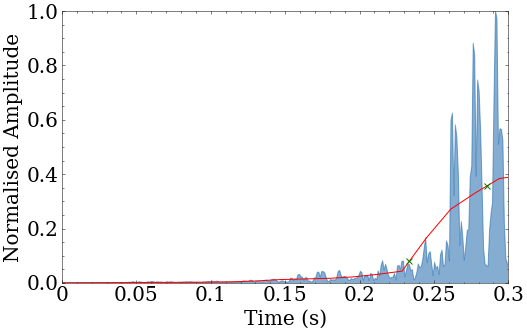

In [240]:
plot_LATRMS(Vox_Med_Gain_D3_String_Lo, 0.05, "Vox Medium Gain D3 Low Intensity")

### JFET Medium Gain D3 Low Intensity

In [241]:
logattacktime(JFET_Med_Gain_D3_String_Lo, 0.05)[0]

-1.293614741203713

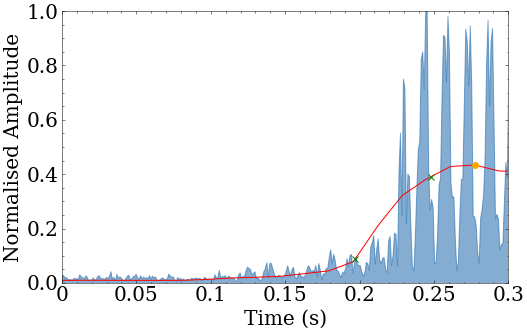

In [242]:
plot_LATRMS(JFET_Med_Gain_D3_String_Lo, 0.05, "JFET Medium Gain D3 Low Intensity")

### Vox Low Gain D3 Low Intensity

In [243]:
logattacktime(Vox_Low_Gain_D3_String_Lo, 0.05)[0]

-1.2887682720550986

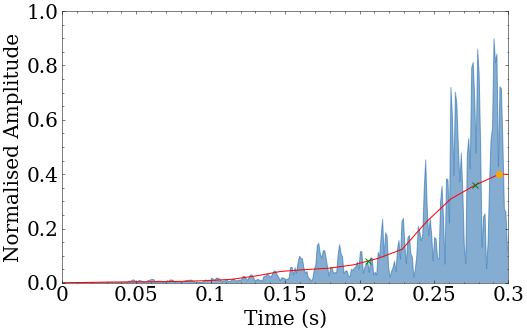

In [244]:
plot_LATRMS(Vox_Hi_Gain_D3_String_Lo, 0.05, "Vox Medium Gain D3 Low Intensity")

### JFET Low Gain D3 Low Intensity

In [245]:
logattacktime(JFET_Low_Gain_D3_String_Lo, 0.05)[0]

-1.286759953907622

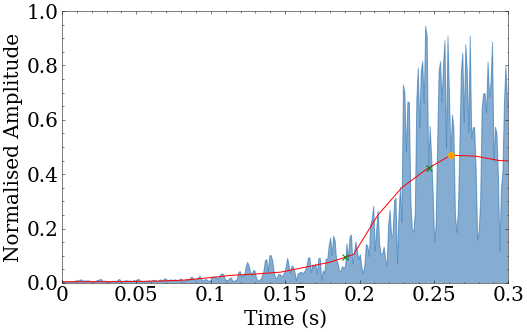

In [246]:
plot_LATRMS(JFET_Hi_Gain_D3_String_Lo, 0.05, "JFET Medium Gain D3 Low Intensity")